# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

# Week1

## Data preprocessing & cleaning

In [2]:
df = pd.read_csv('Supply_chain.csv')

In [3]:
df.head()

Product type                   SKU      Price  Availability  \
0    fragrance   Woody Eau de Parfum   1.699976            39   
1   healthcare  Multivitamin Tablets  75.202244            87   
2     bodycare      Exfoliating Soap  22.916503            90   
3     bodycare   Coconut Body Butter  80.065417            75   
4     bodycare      Exfoliating Soap  74.364683           100   

   Number of products sold  Revenue generated Customer demographics  \
0                      868        9866.465458            Non-binary   
1                      809        8920.095776               Unknown   
2                      832        6777.144443                Female   
3                      167        5711.616781                  Male   
4                      400        7338.061362                  Male   

   Stock levels  Lead times  Order quantities  ...  Lead time  \
0            57          10                52  ...          6   
1            58          28                47  ...         23   
2            59          33                69  ...         30   
3             0          32                44  ...         26   
4            31          32                30  ...         25   

  Production volumes  Manufacturing lead time Manufacturing costs  \
0                656                        3           30.288965   
1                975                       21           40.798640   
2                296                       22           70.226789   
3                529                       25           97.717130   
4                985                        6           52.792169   

  Inspection results  Defect rates  Transportation modes   Routes       Costs  \
0               Fail      8.923234                  Rail  Route E  384.399820   
1               Pass      1.547675                  Rail  Route B  875.980893   
2            Pending      3.216068                   Air  Route C  674.232825   
3               Pass      1.449842                  Road  Route E  723.878925   
4               Fail      2.068435                   Air  Route J  103.916248   

             Date  
0   01-01-18 9:20  
1  01-01-18 17:47  
2   02-01-18 0:50  
3   02-01-18 1:18  
4   02-01-18 2:35  

[5 rows x 25 columns]

In [4]:
No_Rows = df.shape[0]
No_Columns = df.shape[1]

print("No_Rows =", No_Rows, "\nNo_Columns =", No_Columns)

No_Rows = 10000 
No_Columns = 25


In [5]:
df.columns.to_list()

['Product type',
 'SKU',
 'Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Customer demographics',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping carriers',
 'Shipping costs',
 'Supplier name',
 'Location',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Inspection results',
 'Defect rates',
 'Transportation modes',
 'Routes',
 'Costs',
 'Date']

In [6]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
Date                        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             10000 non-null  object 
 1   SKU                      10000 non-null  object 
 2   Price                    10000 non-null  float64
 3   Availability             10000 non-null  int64  
 4   Number of products sold  10000 non-null  int64  
 5   Revenue generated        10000 non-null  float64
 6   Customer demographics    10000 non-null  object 
 7   Stock levels             10000 non-null  int64  
 8   Lead times               10000 non-null  int64  
 9   Order quantities         10000 non-null  int64  
 10  Shipping times           10000 non-null  int64  
 11  Shipping carriers        10000 non-null  object 
 12  Shipping costs           10000 non-null  float64
 13  Supplier name            10000 non-null  object 
 14  Location               

In [8]:
df.describe().T

count          mean           std         min  \
Price                    10000.0     49.187991     27.985300    1.699976   
Availability             10000.0     48.280300     27.954661    1.000000   
Number of products sold  10000.0    466.971700    274.888689    8.000000   
Revenue generated        10000.0  22301.711221  20417.820954   12.924508   
Stock levels             10000.0     47.780600     28.214696    0.000000   
Lead times               10000.0     27.956500      7.243083    2.000000   
Order quantities         10000.0     49.070300     25.203331    1.000000   
Shipping times           10000.0      5.732300      2.492761    1.000000   
Shipping costs           10000.0      5.551080      2.451311    1.013487   
Lead time                10000.0     21.371200      6.651664    1.000000   
Production volumes       10000.0    569.339100    241.097196  104.000000   
Manufacturing lead time  10000.0     14.835900      8.158077    1.000000   
Manufacturing costs      10000.0     47.498517     26.472004    1.085069   
Defect rates             10000.0      3.128166      2.204568    0.500542   
Costs                    10000.0     72.680371    108.749141    2.058718   

                                 25%           50%           75%  \
Price                      27.893450     49.021973     70.393824   
Availability               27.000000     48.000000     69.000000   
Number of products sold   258.000000    465.000000    663.000000   
Revenue generated        5824.249530  17068.018842  33482.836051   
Stock levels               26.000000     48.000000     69.000000   
Lead times                 23.000000     28.000000     34.000000   
Order quantities           31.000000     49.000000     67.000000   
Shipping times              4.000000      6.000000      8.000000   
Shipping costs              3.774130      5.520123      7.365787   
Lead time                  17.000000     22.000000     27.000000   
Production volumes        392.000000    570.000000    749.000000   
Manufacturing lead time     9.000000     15.000000     21.000000   
Manufacturing costs        27.853994     47.371074     66.662905   
Defect rates                1.497578      2.636311      3.756214   
Costs                      34.102315     54.714348     75.298942   

                                   max  
Price                        99.171329  
Availability                100.000000  
Number of products sold     996.000000  
Revenue generated        103648.261247  
Stock levels                100.000000  
Lead times                   47.000000  
Order quantities             96.000000  
Shipping times               10.000000  
Shipping costs                9.929816  
Lead time                    33.000000  
Production volumes          985.000000  
Manufacturing lead time      30.000000  
Manufacturing costs          99.466109  
Defect rates                  9.985117  
Costs                       997.413450

In [9]:
# Check categorical stats
df.describe(include='O')

Product type                  SKU Customer demographics  \
count         10000                10000                 10000   
unique           10                  105                     4   
top      healthcare  Woody Eau de Parfum                Female   
freq           1091                  118                  2546   

       Shipping carriers Supplier name   Location Inspection results  \
count              10000         10000      10000              10000   
unique                 5             5          8                  3   
top                FedEx    Supplier D  Hyderabad               Pass   
freq                2070          2032       1315               3385   

       Transportation modes   Routes            Date  
count                 10000    10000           10000  
unique                    4       10            9987  
top                     Air  Route B  07-02-20 14:11  
freq                   2559     1052               2

In [10]:
for c in df.select_dtypes(include=["object", "string"]).columns:
    df[c] = df[c].astype("string").str.replace(r"\s+", " ", regex=True).str.strip()
    df[c] = df[c].replace({"": pd.NA})

In [11]:
df.head()

Product type                   SKU      Price  Availability  \
0    fragrance   Woody Eau de Parfum   1.699976            39   
1   healthcare  Multivitamin Tablets  75.202244            87   
2     bodycare      Exfoliating Soap  22.916503            90   
3     bodycare   Coconut Body Butter  80.065417            75   
4     bodycare      Exfoliating Soap  74.364683           100   

   Number of products sold  Revenue generated Customer demographics  \
0                      868        9866.465458            Non-binary   
1                      809        8920.095776               Unknown   
2                      832        6777.144443                Female   
3                      167        5711.616781                  Male   
4                      400        7338.061362                  Male   

   Stock levels  Lead times  Order quantities  ...  Lead time  \
0            57          10                52  ...          6   
1            58          28                47  ...         23   
2            59          33                69  ...         30   
3             0          32                44  ...         26   
4            31          32                30  ...         25   

  Production volumes  Manufacturing lead time Manufacturing costs  \
0                656                        3           30.288965   
1                975                       21           40.798640   
2                296                       22           70.226789   
3                529                       25           97.717130   
4                985                        6           52.792169   

  Inspection results  Defect rates  Transportation modes   Routes       Costs  \
0               Fail      8.923234                  Rail  Route E  384.399820   
1               Pass      1.547675                  Rail  Route B  875.980893   
2            Pending      3.216068                   Air  Route C  674.232825   
3               Pass      1.449842                  Road  Route E  723.878925   
4               Fail      2.068435                   Air  Route J  103.916248   

             Date  
0   01-01-18 9:20  
1  01-01-18 17:47  
2   02-01-18 0:50  
3   02-01-18 1:18  
4   02-01-18 2:35  

[5 rows x 25 columns]

In [12]:
current_columns = [
 'Product type',
 'SKU',
 'Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Customer demographics',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping carriers',
 'Shipping costs',
 'Supplier name',
 'Location',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Inspection results',
 'Defect rates',
 'Transportation modes',
 'Routes',
 'Costs',
 'Date'
]



new_column_names_map = {col: col.replace(' ', '_') for col in current_columns}


df.rename(columns=new_column_names_map, inplace=True)

In [13]:
df.head()

Product_type                   SKU      Price  Availability  \
0    fragrance   Woody Eau de Parfum   1.699976            39   
1   healthcare  Multivitamin Tablets  75.202244            87   
2     bodycare      Exfoliating Soap  22.916503            90   
3     bodycare   Coconut Body Butter  80.065417            75   
4     bodycare      Exfoliating Soap  74.364683           100   

   Number_of_products_sold  Revenue_generated Customer_demographics  \
0                      868        9866.465458            Non-binary   
1                      809        8920.095776               Unknown   
2                      832        6777.144443                Female   
3                      167        5711.616781                  Male   
4                      400        7338.061362                  Male   

   Stock_levels  Lead_times  Order_quantities  ...  Lead_time  \
0            57          10                52  ...          6   
1            58          28                47  ...         23   
2            59          33                69  ...         30   
3             0          32                44  ...         26   
4            31          32                30  ...         25   

  Production_volumes  Manufacturing_lead_time Manufacturing_costs  \
0                656                        3           30.288965   
1                975                       21           40.798640   
2                296                       22           70.226789   
3                529                       25           97.717130   
4                985                        6           52.792169   

  Inspection_results  Defect_rates  Transportation_modes   Routes       Costs  \
0               Fail      8.923234                  Rail  Route E  384.399820   
1               Pass      1.547675                  Rail  Route B  875.980893   
2            Pending      3.216068                   Air  Route C  674.232825   
3               Pass      1.449842                  Road  Route E  723.878925   
4               Fail      2.068435                   Air  Route J  103.916248   

             Date  
0   01-01-18 9:20  
1  01-01-18 17:47  
2   02-01-18 0:50  
3   02-01-18 1:18  
4   02-01-18 2:35  

[5 rows x 25 columns]

In [14]:
df = df.dropna(how="all")  
df = df.reset_index(drop=True)

In [15]:
No_Rows = df.shape[0]
No_Columns = df.shape[1]

print("No_Rows =", No_Rows, "\nNo_Columns =", No_Columns)

No_Rows = 10000 
No_Columns = 25


In [16]:
df.dtypes.to_frame("dtype")

dtype
Product_type             string[python]
SKU                      string[python]
Price                           float64
Availability                      int64
Number_of_products_sold           int64
Revenue_generated               float64
Customer_demographics    string[python]
Stock_levels                      int64
Lead_times                        int64
Order_quantities                  int64
Shipping_times                    int64
Shipping_carriers        string[python]
Shipping_costs                  float64
Supplier_name            string[python]
Location                 string[python]
Lead_time                         int64
Production_volumes                int64
Manufacturing_lead_time           int64
Manufacturing_costs             float64
Inspection_results       string[python]
Defect_rates                    float64
Transportation_modes     string[python]
Routes                   string[python]
Costs                           float64
Date                     string[python]

In [17]:
num_cols = df.select_dtypes(include="number").columns
neg_counts = {c: int((df[c] < 0).sum()) for c in num_cols}
pd.Series(neg_counts, name="negative_values_count")

Price                      0
Availability               0
Number_of_products_sold    0
Revenue_generated          0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_costs             0
Lead_time                  0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Defect_rates               0
Costs                      0
Name: negative_values_count, dtype: int64

In [18]:
nulls = df.isna().sum().sort_values(ascending=False)
nulls.to_frame("nulls_count")

nulls_count
Product_type                       0
SKU                                0
Price                              0
Availability                       0
Number_of_products_sold            0
Revenue_generated                  0
Customer_demographics              0
Stock_levels                       0
Lead_times                         0
Order_quantities                   0
Shipping_times                     0
Shipping_carriers                  0
Shipping_costs                     0
Supplier_name                      0
Location                           0
Lead_time                          0
Production_volumes                 0
Manufacturing_lead_time            0
Manufacturing_costs                0
Inspection_results                 0
Defect_rates                       0
Transportation_modes               0
Routes                             0
Costs                              0
Date                               0

In [19]:
n_dups = int(df.duplicated().sum())
dups_preview = df[df.duplicated(keep=False)].head(10)
print("NO.Duplicated:", n_dups)
dups_preview.T

NO.Duplicated: 0


Empty DataFrame
Columns: []
Index: [Product_type, SKU, Price, Availability, Number_of_products_sold, Revenue_generated, Customer_demographics, Stock_levels, Lead_times, Order_quantities, Shipping_times, Shipping_carriers, Shipping_costs, Supplier_name, Location, Lead_time, Production_volumes, Manufacturing_lead_time, Manufacturing_costs, Inspection_results, Defect_rates, Transportation_modes, Routes, Costs, Date]

In [20]:
Date = [c for c in df.columns if "date" in c.lower()]

for c in Date:
    df[c] = pd.to_datetime(df[c], errors="coerce", dayfirst=True)

df[Date].head()

Date
0 2018-01-01 09:20:00
1 2018-01-01 17:47:00
2 2018-01-02 00:50:00
3 2018-01-02 01:18:00
4 2018-01-02 02:35:00

In [21]:
# خلية 12: عرض التاريخ فقط بدون الوقت (YYYY-MM-DD)
for c in Date:
    # نحول القيمة إلى التاريخ فقط
    df[c] = df[c].dt.date

df[Date].head()

Date
0  2018-01-01
1  2018-01-01
2  2018-01-02
3  2018-01-02
4  2018-01-02

In [22]:
df.head()

Product_type                   SKU      Price  Availability  \
0    fragrance   Woody Eau de Parfum   1.699976            39   
1   healthcare  Multivitamin Tablets  75.202244            87   
2     bodycare      Exfoliating Soap  22.916503            90   
3     bodycare   Coconut Body Butter  80.065417            75   
4     bodycare      Exfoliating Soap  74.364683           100   

   Number_of_products_sold  Revenue_generated Customer_demographics  \
0                      868        9866.465458            Non-binary   
1                      809        8920.095776               Unknown   
2                      832        6777.144443                Female   
3                      167        5711.616781                  Male   
4                      400        7338.061362                  Male   

   Stock_levels  Lead_times  Order_quantities  ...  Lead_time  \
0            57          10                52  ...          6   
1            58          28                47  ...         23   
2            59          33                69  ...         30   
3             0          32                44  ...         26   
4            31          32                30  ...         25   

  Production_volumes  Manufacturing_lead_time Manufacturing_costs  \
0                656                        3           30.288965   
1                975                       21           40.798640   
2                296                       22           70.226789   
3                529                       25           97.717130   
4                985                        6           52.792169   

  Inspection_results  Defect_rates  Transportation_modes   Routes       Costs  \
0               Fail      8.923234                  Rail  Route E  384.399820   
1               Pass      1.547675                  Rail  Route B  875.980893   
2            Pending      3.216068                   Air  Route C  674.232825   
3               Pass      1.449842                  Road  Route E  723.878925   
4               Fail      2.068435                   Air  Route J  103.916248   

         Date  
0  2018-01-01  
1  2018-01-01  
2  2018-01-02  
3  2018-01-02  
4  2018-01-02  

[5 rows x 25 columns]

In [23]:
df["Expected_Revenue"] = df["Price"] * df["Number_of_products_sold"]
df["Expected_Costs"] = df["Manufacturing_costs"] + df["Shipping_costs"]

In [24]:
df["Revenue_Deviation"] = ((df["Revenue_generated"] - df["Expected_Revenue"]) /
                             df["Expected_Revenue"]) * 100

df["Cost_Deviation"] = ((df["Costs"] - df["Expected_Costs"]) /
                          df["Expected_Costs"]) * 100

In [25]:
new_order = [
    'Product_type', 'SKU', 'Price', 'Availability', 'Number_of_products_sold',
    'Revenue_generated', 'Expected_Revenue', 'Revenue_Deviation',
    'Customer_demographics', 'Stock_levels', 'Lead_times', 'Order_quantities',
    'Shipping_times', 'Shipping_carriers',
    'Shipping_costs', 'Manufacturing_costs', 'Costs', 'Expected_Costs', 'Cost_Deviation',
    'Supplier_name', 'Location', 'Lead_time', 'Production_volumes',
    'Manufacturing_lead_time', 'Inspection_results', 'Defect_rates',
    'Transportation_modes', 'Routes', 'Date'
]

df = df[new_order]

In [26]:
df.head()

Product_type                   SKU      Price  Availability  \
0    fragrance   Woody Eau de Parfum   1.699976            39   
1   healthcare  Multivitamin Tablets  75.202244            87   
2     bodycare      Exfoliating Soap  22.916503            90   
3     bodycare   Coconut Body Butter  80.065417            75   
4     bodycare      Exfoliating Soap  74.364683           100   

   Number_of_products_sold  Revenue_generated  Expected_Revenue  \
0                      868        9866.465458       1475.579180   
1                      809        8920.095776      60838.615236   
2                      832        6777.144443      19066.530896   
3                      167        5711.616781      13370.924563   
4                      400        7338.061362      29745.873061   

   Revenue_Deviation Customer_demographics  Stock_levels  ...  Supplier_name  \
0         568.650357            Non-binary            57  ...     Supplier B   
1         -85.338102               Unknown            58  ...     Supplier D   
2         -64.455283                Female            59  ...     Supplier E   
3         -57.283307                  Male             0  ...     Supplier A   
4         -75.330825                  Male            31  ...     Supplier D   

    Location  Lead_time Production_volumes  Manufacturing_lead_time  \
0     Mumbai          6                656                        3   
1      Delhi         23                975                       21   
2    Chennai         30                296                       22   
3  Bangalore         26                529                       25   
4  Hyderabad         25                985                        6   

   Inspection_results  Defect_rates  Transportation_modes   Routes        Date  
0                Fail      8.923234                  Rail  Route E  2018-01-01  
1                Pass      1.547675                  Rail  Route B  2018-01-01  
2             Pending      3.216068                   Air  Route C  2018-01-02  
3                Pass      1.449842                  Road  Route E  2018-01-02  
4                Fail      2.068435                   Air  Route J  2018-01-02  

[5 rows x 29 columns]

In [27]:
outliers = df[(df["Revenue_Deviation"].abs() > 10) | (df["Cost_Deviation"].abs() > 10)]

In [28]:
No_Rows = outliers.shape[0]
print("No_Rows =", No_Rows)

No_Rows = 430


In [29]:
outlier_indices = outliers.index

df = df.drop(outlier_indices)

In [30]:
No_Rows = df.shape[0]
No_Columns = df.shape[1]

print("No_Rows =", No_Rows, "\nNo_Columns =", No_Columns)

No_Rows = 9570 
No_Columns = 29


In [31]:
EDA_Columns = ['Product_type',
 'Customer_demographics',
 'Shipping_carriers',
 'Supplier_name',
 'Location',
 'Inspection_results',
 'Transportation_modes',
 'Routes',]

for col in EDA_Columns :
    print(df[col].value_counts())
    print('-----------------*************--------------------')
    print('-----------------*************--------------------')

Product_type
healthcare    1039
grooming       980
fragrance      969
bodycare       969
cosmetics      968
skincare       964
babycare       941
wellness       931
haircare       918
nailcare       891
Name: count, dtype: Int64
-----------------*************--------------------
-----------------*************--------------------
Customer_demographics
Female        2441
Unknown       2415
Male          2396
Non-binary    2318
Name: count, dtype: Int64
-----------------*************--------------------
-----------------*************--------------------
Shipping_carriers
FedEx        1984
UPS          1904
Blue Dart    1901
Delhivery    1891
DHL          1890
Name: count, dtype: Int64
-----------------*************--------------------
-----------------*************--------------------
Supplier_name
Supplier D    1935
Supplier B    1931
Supplier A    1929
Supplier E    1893
Supplier C    1882
Name: count, dtype: Int64
-----------------*************--------------------
-----------------****

In [32]:
df["Net_profit"] = df["Expected_Revenue"] - df["Costs"]

In [33]:
df["Delay"] = df["Lead_times"] - (df["Lead_time"] + df["Shipping_times"]) 

In [35]:
df.to_csv("supply_chain_cleaned.csv", index=False)

In [34]:
df["Delay"] = df["Delay"].clip(lower=0)

In [35]:
df = df.round(2)

# Week2

## المجموعة 1: التحليل الوصفي للبيانات

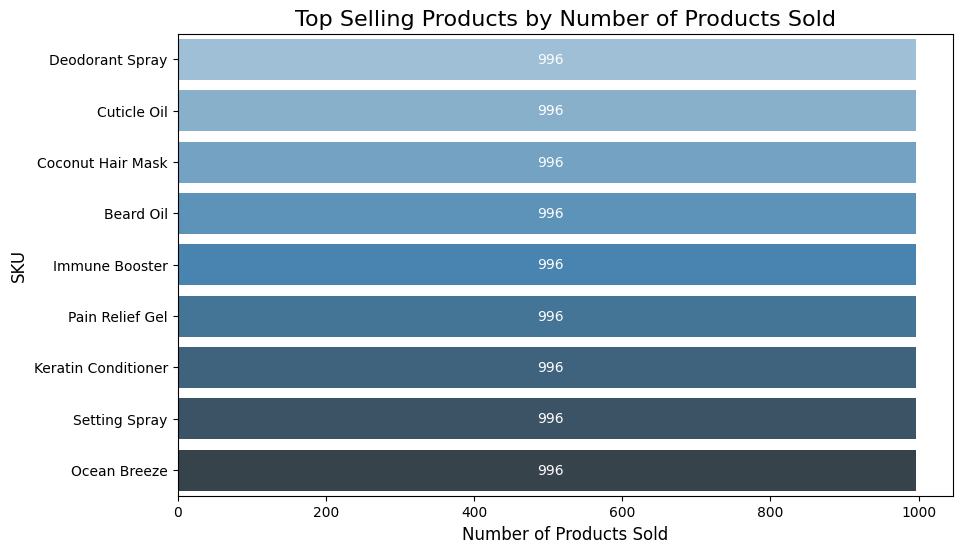

In [36]:
# Sort by Number_of_products_sold and get the top 10
top_selling_products = df.sort_values('Number_of_products_sold', ascending=False).head(10)



plt.figure(figsize=(10,6))
ax = sns.barplot(x='Number_of_products_sold', y='SKU', data=top_selling_products, palette="Blues_d")
plt.title("Top Selling Products by Number of Products Sold", fontsize=16)
plt.xlabel('Number of Products Sold', fontsize=12)
plt.ylabel('SKU', fontsize=12)

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='white')

plt.show()

In [37]:
# Get the product with the highest revenue
highest_revenue_product = df.loc[df['Revenue_generated'].idxmax()]

# Display the product with highest revenue
print(highest_revenue_product[['SKU', 'Revenue_generated']])

SKU                  Green Tea Pack
Revenue_generated         103648.26
Name: 8234, dtype: object


In [38]:
# Get the SKU with the highest net profit
highest_profit_sku = df.loc[df['Net_profit'].idxmax()]

# Display the SKU with the highest net profit
print(highest_profit_sku[['SKU', 'Net_profit']])

SKU           Aromatherapy Candle
Net_profit               98771.12
Name: 4556, dtype: object


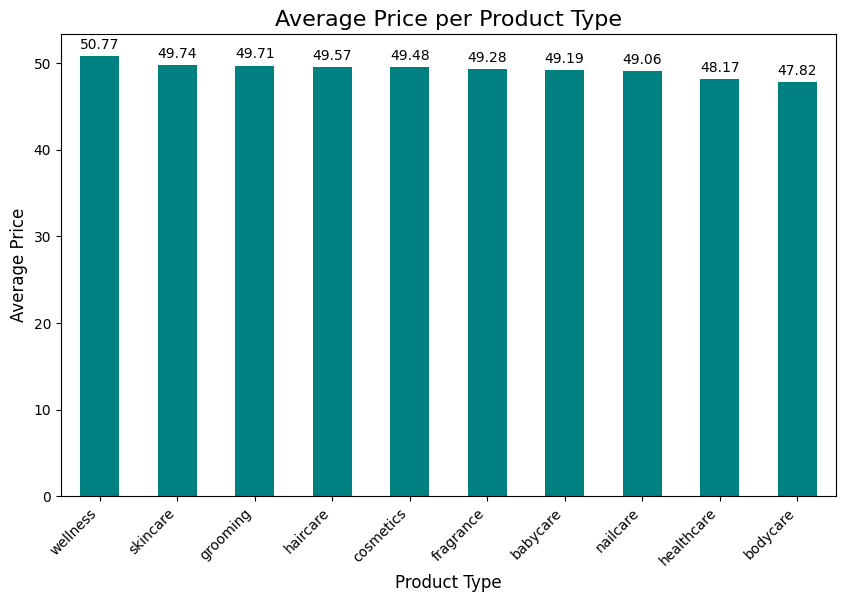

In [39]:
# Calculate average price per Product_type
avg_price_per_type = df.groupby('Product_type')['Price'].mean().sort_values(ascending=False).round(2)

# Plot average price per product type
plt.figure(figsize=(10,6))
ax = avg_price_per_type.plot(kind='bar', color='teal')
plt.title('Average Price per Product Type', fontsize=16)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

plt.show()

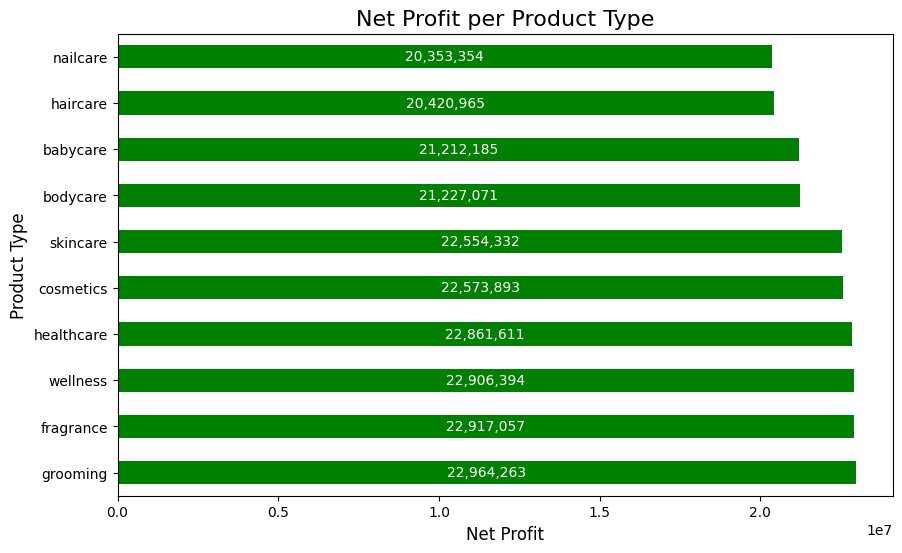

In [40]:
# Calculate net profit per product type
net_profit_per_type = df.groupby('Product_type')['Net_profit'].sum().sort_values(ascending=False)



# Plot net profit per product type as horizontal bar chart
plt.figure(figsize=(10,6))
ax = net_profit_per_type.plot(kind='barh', color='green')
plt.title('Net Profit per Product Type', fontsize=16)
plt.xlabel('Net Profit', fontsize=12)
plt.ylabel('Product Type', fontsize=12)

# Display the values inside the bars (in the middle of each bar)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', fontsize=10, color='white', label_type='center')

plt.show()

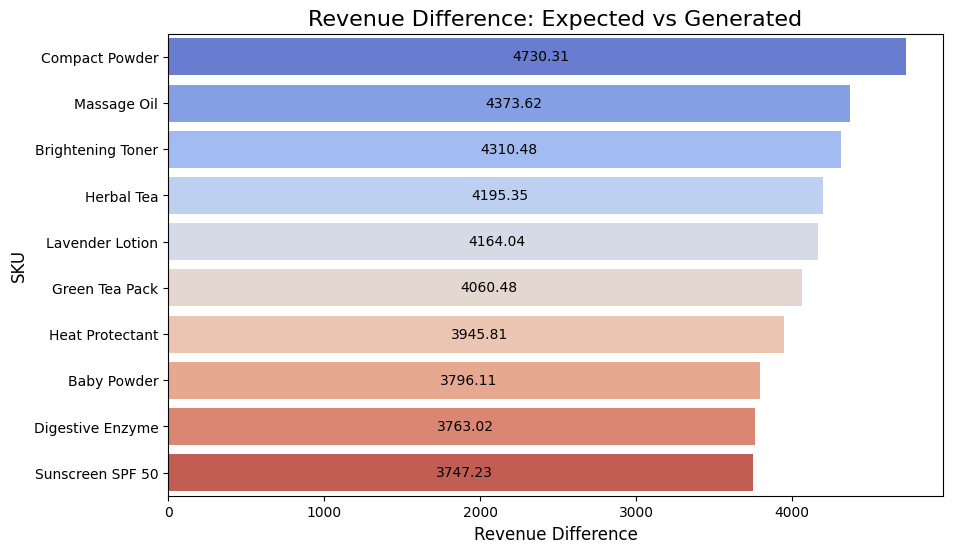

In [41]:
# Calculate the revenue difference
df['Revenue_diff'] = df['Expected_Revenue'] - df['Revenue_generated']

# Plot the difference in revenue for each product
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Revenue_diff', y='SKU', data=df.sort_values('Revenue_diff', ascending=False).head(10), palette="coolwarm")
plt.title('Revenue Difference: Expected vs Generated', fontsize=16)
plt.xlabel('Revenue Difference', fontsize=12)
plt.ylabel('SKU', fontsize=12)

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='black')

plt.show()

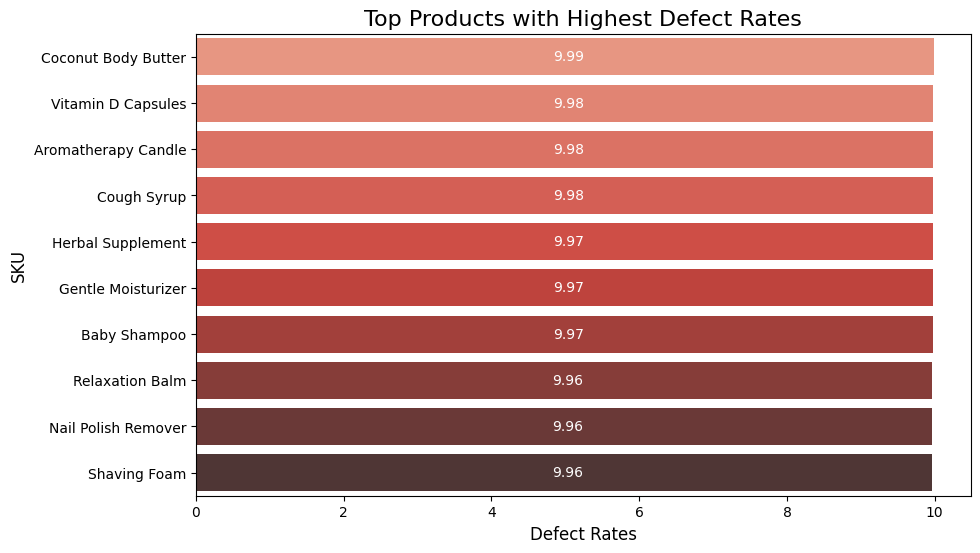

In [42]:
# Sort by Defect_rates and get the top 10 products
top_defect_products = df.sort_values('Defect_rates', ascending=False).head(10)

# Plot products with the highest defect rates
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Defect_rates', y='SKU', data=top_defect_products, palette="Reds_d")
plt.title('Top Products with Highest Defect Rates', fontsize=16)
plt.xlabel('Defect Rates', fontsize=12)
plt.ylabel('SKU', fontsize=12)

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='white')

plt.show()

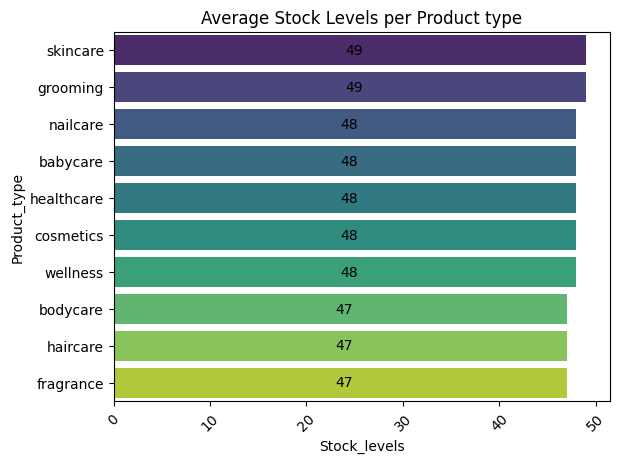

In [43]:
data = df.groupby("Product_type")["Stock_levels"].mean().reset_index()
data["Stock_levels"] = data["Stock_levels"].round(0)  # أو round(1) لو عايز رقم عشري واحد
data = data.sort_values("Stock_levels", ascending=False)

ax = sns.barplot(
    data = data,
    y="Product_type",
    x="Stock_levels",
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Average Stock Levels per Product type")

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='black')

plt.show()

## المجموعة 2: التحليل بين المتغيرات

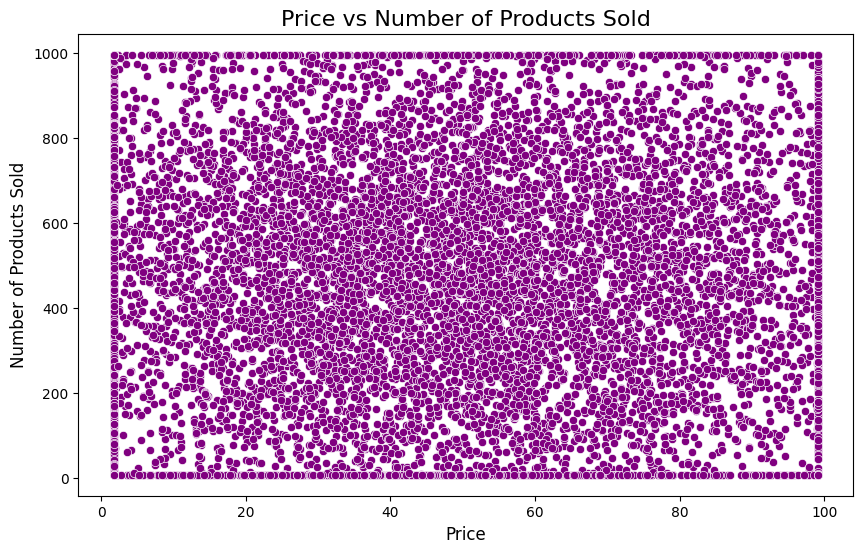

In [44]:
# Plot the relationship between Price and Number_of_products_sold
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Number_of_products_sold', data=df, color='purple')
plt.title('Price vs Number of Products Sold', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Products Sold', fontsize=12)
plt.show()

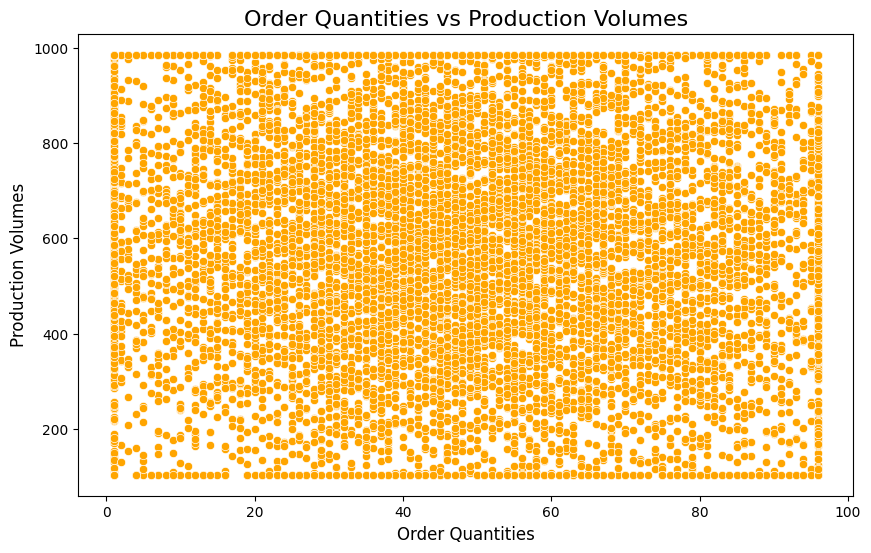

In [45]:
# Plot the relationship between Order_quantities and Production_volumes
plt.figure(figsize=(10,6))
sns.scatterplot(x='Order_quantities', y='Production_volumes', data=df, color='orange')
plt.title('Order Quantities vs Production Volumes', fontsize=16)
plt.xlabel('Order Quantities', fontsize=12)
plt.ylabel('Production Volumes', fontsize=12)
plt.show()

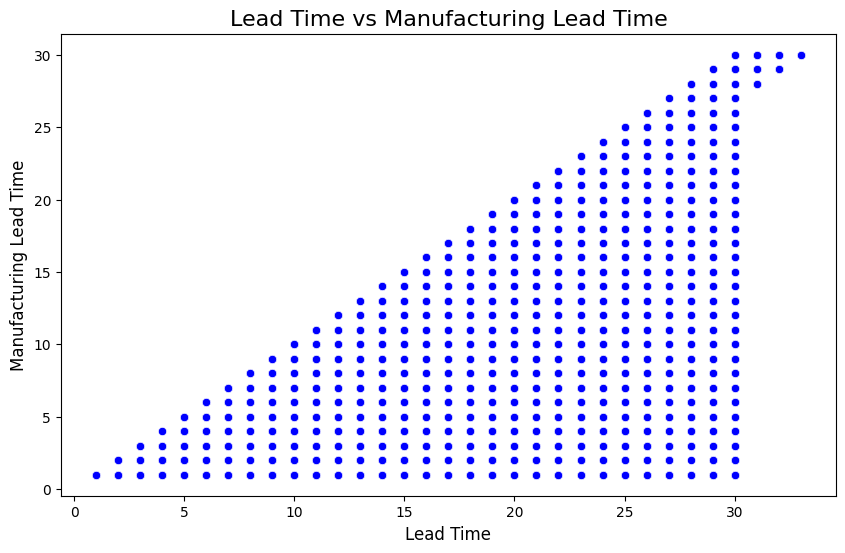

In [46]:
# Plot the relationship between Lead_time and Manufacturing_lead_time
plt.figure(figsize=(10,6))
sns.scatterplot(x='Lead_time', y='Manufacturing_lead_time', data=df, color='blue')
plt.title('Lead Time vs Manufacturing Lead Time', fontsize=16)
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Manufacturing Lead Time', fontsize=12)
plt.show()

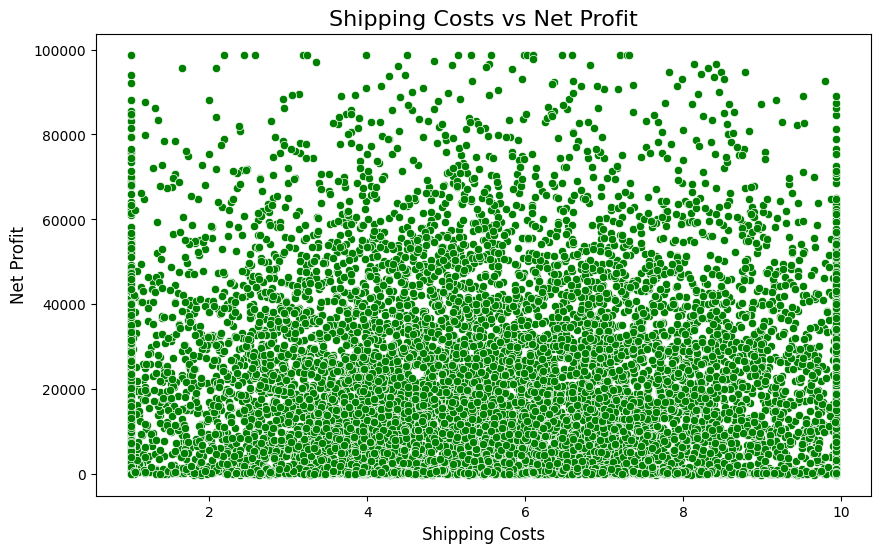

In [47]:
# Plot the relationship between Shipping_costs and Net_profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Shipping_costs', y='Net_profit', data=df, color='green')
plt.title('Shipping Costs vs Net Profit', fontsize=16)
plt.xlabel('Shipping Costs', fontsize=12)
plt.ylabel('Net Profit', fontsize=12)
plt.show()

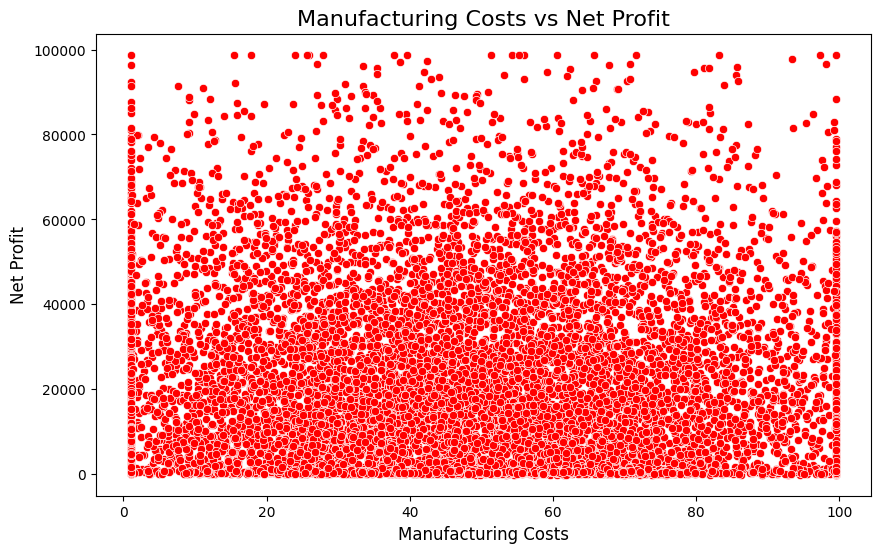

In [48]:
# Plot the relationship between Manufacturing_costs and Net_profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Manufacturing_costs', y='Net_profit', data=df, color='red')
plt.title('Manufacturing Costs vs Net Profit', fontsize=16)
plt.xlabel('Manufacturing Costs', fontsize=12)
plt.ylabel('Net Profit', fontsize=12)
plt.show()

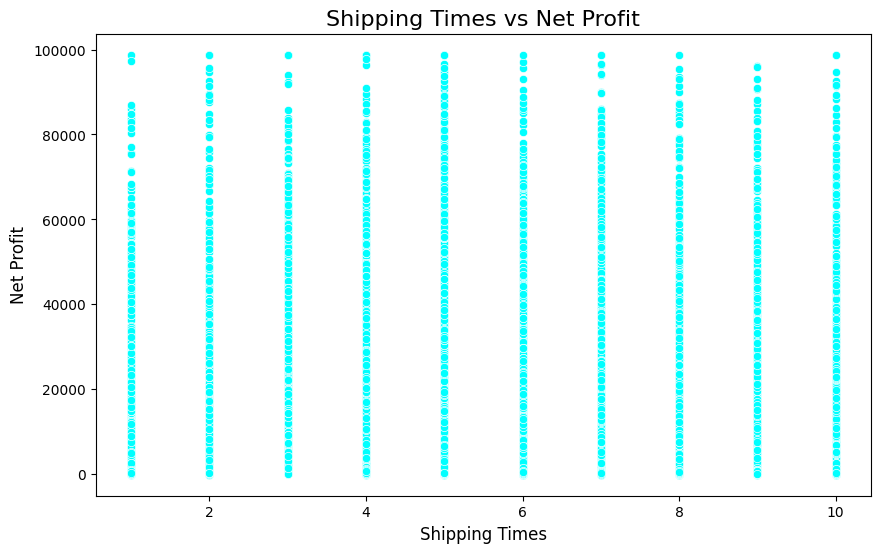

In [49]:
# Plot the relationship between Shipping_times and Net_profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Shipping_times', y='Net_profit', data=df, color='cyan')
plt.title('Shipping Times vs Net Profit', fontsize=16)
plt.xlabel('Shipping Times', fontsize=12)
plt.ylabel('Net Profit', fontsize=12)
plt.show()

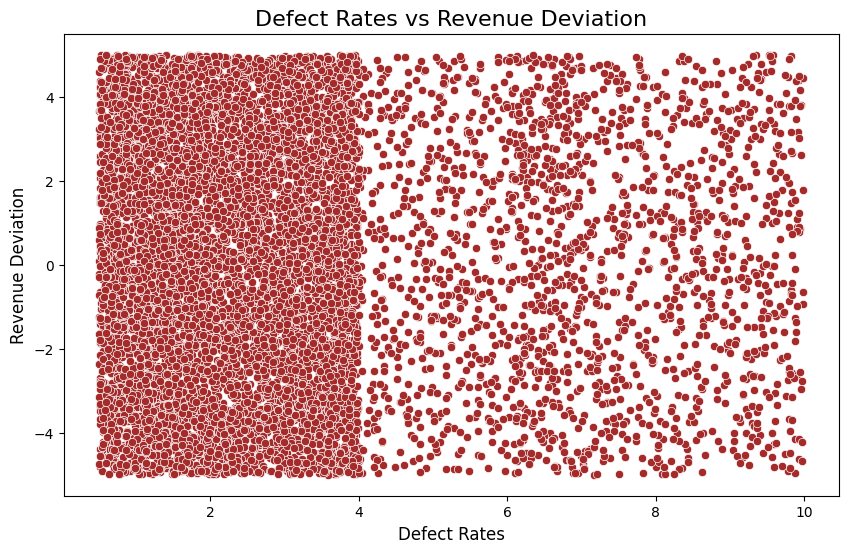

In [50]:
# Plot the relationship between Defect_rates and Revenue_Deviation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Defect_rates', y='Revenue_Deviation', data=df, color='brown')
plt.title('Defect Rates vs Revenue Deviation', fontsize=16)
plt.xlabel('Defect Rates', fontsize=12)
plt.ylabel('Revenue Deviation', fontsize=12)
plt.show()

## المجموعة 3: التحليل الزمني

In [51]:
# تحويل التاريخ لسنة
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# تجميع الإيراد لكل سنة ولكل نوع منتج
yearly_sales = df.groupby(['Year', 'Product_type'], as_index=False)['Revenue_generated'].sum()

# حساب الإيراد بالمليون
yearly_sales['Total_Revenue'] = yearly_sales['Revenue_generated'] / 1_000_000

# رسم العمود
fig = px.bar(
    yearly_sales,
    x='Year',
    y='Revenue_generated',
    color='Product_type',
    title='Annual Sales by Product Type',
    labels={'Year': 'Year', 'Revenue_generated': 'Total Revenue'},
    custom_data=['Product_type', 'Total_Revenue']
)

# تخصيص الـ tooltip
fig.update_traces(
    hovertemplate=(
        'Product: %{customdata[0]}<br>'
        'Year: %{x}<br>'
        'Total_Revenue: %{customdata[1]:.2f}M<br>'
        '<extra></extra>'
    )
)

fig.update_layout(barmode='stack')

fig.show()

In [52]:
# Group by Year and Product_type to calculate annual revenue
Yearly_revenue = df.groupby(['Year'])['Revenue_generated'].sum().reset_index()

Yearly_revenue['Total_Revenue'] = Yearly_revenue['Revenue_generated'] / 1_000_000


# Plot seasonal trend of Revenue Generated
fig = px.line(Yearly_revenue, x='Year', y='Revenue_generated', markers=True, 
              title='Annual Sales by Product Type', labels={'Total_Revenue': 'Revenue Generated'})

# Add customdata for tooltip
fig.update_traces(
    customdata=Yearly_revenue[['Total_Revenue']],
    hovertemplate=(
        'Year: %{x}<br>'
        'Total_Revenue: %{customdata[0]:.2f}M<br>'
        '<extra></extra>'
    )
)

fig.show()

In [53]:
# تأكد إن Date في شكل datetime
df['Date'] = pd.to_datetime(df['Date'])

# استخراج Year و Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Product_type, calculate total revenue for each year
monthly_sales = df.groupby(['Year', 'Month', 'Product_type'])['Revenue_generated'].sum().reset_index()

# Get max & min revenue rows per product
idx_max = monthly_sales.groupby('Product_type')['Revenue_generated'].idxmax()
idx_min = monthly_sales.groupby('Product_type')['Revenue_generated'].idxmin()

max_rows = monthly_sales.loc[idx_max].copy()
max_rows['Extreme'] = 'Max revenue'

min_rows = monthly_sales.loc[idx_min].copy()
min_rows['Extreme'] = 'Min revenue'

extreme_sales = pd.concat([max_rows, min_rows], ignore_index=True)

# Convert month number to name
extreme_sales['Month'] = extreme_sales['Month'].apply(lambda m: calendar.month_name[m])

# Convert revenue to k
extreme_sales['Revenue_k'] = extreme_sales['Revenue_generated'] / 1000

# Line chart
fig = px.line(
    extreme_sales,
    x='Product_type',
    y='Revenue_generated',
    color='Extreme',
    markers=True,
    title='Max & Min Month Revenue per Product Type',
    labels={'Revenue_generated': 'Revenue Generated', 'Product_type': 'Product Type'},
    custom_data=['Product_type', 'Year', 'Month', 'Revenue_k']
)

# Tooltip
fig.update_traces(
    hovertemplate=(
        'Product: %{customdata[0]}<br>'
        'Year: %{customdata[1]}<br>'
        'Month: %{customdata[2]}<br>'
        'Revenue: %{customdata[3]:.2f}k<br>'
        '<extra></extra>'
    )
)

# Clean legend title
fig.update_layout(legend_title_text='')

fig.show()

In [54]:
# التأكد من أن التاريخ datetime
df['Date'] = pd.to_datetime(df['Date'])

# استخراج رقم واسم الشهر
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()

# إجمالي العائد لكل Product في كل شهر عبر السنين
monthly_sales = (
    df.groupby(['Product_type', 'Month', 'MonthName'], as_index=False)['Revenue_generated']
      .sum()
      .sort_values(['Product_type', 'Month'])
)

# تحديد أعلى وأقل شهر لكل منتج
idx_max = monthly_sales.groupby('Product_type')['Revenue_generated'].idxmax()
idx_min = monthly_sales.groupby('Product_type')['Revenue_generated'].idxmin()

max_rows = monthly_sales.loc[idx_max].copy()
max_rows['Extreme'] = 'Max revenue'

min_rows = monthly_sales.loc[idx_min].copy()
min_rows['Extreme'] = 'Min revenue'

extreme_sales = pd.concat([max_rows, min_rows], ignore_index=True)

# إضافة Revenue 
extreme_sales['Revenue_M'] = extreme_sales['Revenue_generated'] / 1_000_000


# رسم Bar Chart
fig = px.bar(
    extreme_sales,
    x='Product_type',
    y='Revenue_generated',
    color='Extreme',
    barmode='group',   # يخلي الماكس والـ مين جنب بعض لكل منتج
    title='Max & Min Monthly Revenue per Product (Across All Years)',
    labels={'Product_type': 'Product Type', 'Revenue_generated': 'Revenue'},
    custom_data=['Product_type', 'MonthName', 'Revenue_M']
)

# تخصيص الـ tooltip
fig.update_traces(
    hovertemplate=(
        'Product: %{customdata[0]}<br>'
        'Month: %{customdata[1]}<br>'
        'Revenue: %{customdata[2]:.2f}M<br>'
        '<extra></extra>'
    )
)

fig.update_layout(legend_title_text='')

fig.show()

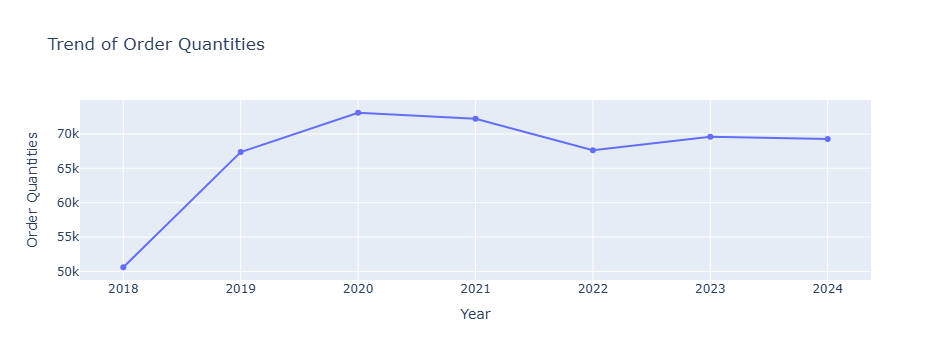

In [55]:
# Group by year to analyze the trend in Order_quantities
Yearly_order_quantity = df.groupby(['Year'])['Order_quantities'].sum().reset_index()

# Plot seasonal trend of Order Quantities
fig = px.line(Yearly_order_quantity, x='Year', y='Order_quantities', markers=True, 
              title='Trend of Order Quantities', labels={'Order_quantities': 'Order Quantities'})
fig.show()

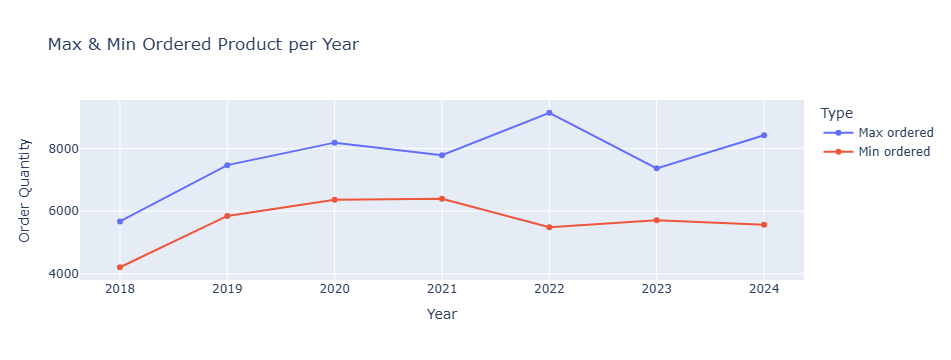

In [56]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year
df['Year'] = df['Date'].dt.year

# Compute total orders per Product_type per Year
yearly_product_orders = df.groupby(['Year', 'Product_type'], as_index=False)['Order_quantities'].sum()

# Get max and min per year
idx_max = yearly_product_orders.groupby('Year')['Order_quantities'].idxmax()
idx_min = yearly_product_orders.groupby('Year')['Order_quantities'].idxmin()

max_rows = yearly_product_orders.loc[idx_max].copy()
max_rows['Type'] = 'Max ordered'

min_rows = yearly_product_orders.loc[idx_min].copy()
min_rows['Type'] = 'Min ordered'

# If max and min are same product in a year → remove duplicate
extreme_orders = pd.concat([max_rows, min_rows], ignore_index=True)
extreme_orders = extreme_orders.drop_duplicates(subset=['Year', 'Product_type', 'Order_quantities'])

# Create line chart
fig = px.line(
    extreme_orders,
    x='Year',
    y='Order_quantities',
    color='Type',
    markers=True,
    title='Max & Min Ordered Product per Year',
    labels={'Order_quantities': 'Order Quantity'},
    custom_data=['Product_type']
)

fig.update_traces(
    hovertemplate=
    'Year: %{x}<br>' +
    'Product: %{customdata[0]}<br>' +
    'Orders: %{y}K<br>' +
    '<extra></extra>'
)

fig.show()

## المجموعة 4: تحليل الموردين

In [57]:
# Group by Supplier_name to find the supplier with the highest order quantities
supplier_order_quantities = df.groupby('Supplier_name')['Order_quantities'].sum().reset_index()

# Get the supplier with the highest order quantities
top_supplier_order = supplier_order_quantities.loc[supplier_order_quantities['Order_quantities'].idxmax()]

# Display the result
print(top_supplier_order)

Supplier_name       Supplier A
Order_quantities         96153
Name: 0, dtype: object


In [58]:
# Group by Supplier_name to calculate the supplier with the highest net profit
supplier_net_profit = df.groupby('Supplier_name')['Net_profit'].sum().reset_index()

# Get the supplier with the highest net profit
top_supplier_profit = supplier_net_profit.loc[supplier_net_profit['Net_profit'].idxmax()]

# Display the result
print(top_supplier_profit)

Supplier_name     Supplier D
Net_profit       44586432.77
Name: 3, dtype: object


In [59]:
# Group by Supplier_name to find the supplier causing the most delay
supplier_delay = df.groupby('Supplier_name')['Delay'].sum().reset_index()

# Get the supplier with the highest delay
top_supplier_delay = supplier_delay.loc[supplier_delay['Delay'].idxmax()]

# Display the result
print(top_supplier_delay)

Supplier_name    Supplier A
Delay                  1917
Name: 0, dtype: object


In [60]:
# Group by Supplier_name to find the supplier with the highest revenue generated
supplier_revenue = df.groupby('Supplier_name')['Revenue_generated'].sum().reset_index()

# Get the supplier with the highest revenue
top_supplier_revenue = supplier_revenue.loc[supplier_revenue['Revenue_generated'].idxmax()]

# Display the result
print(top_supplier_revenue)

Supplier_name        Supplier D
Revenue_generated    44659527.9
Name: 3, dtype: object


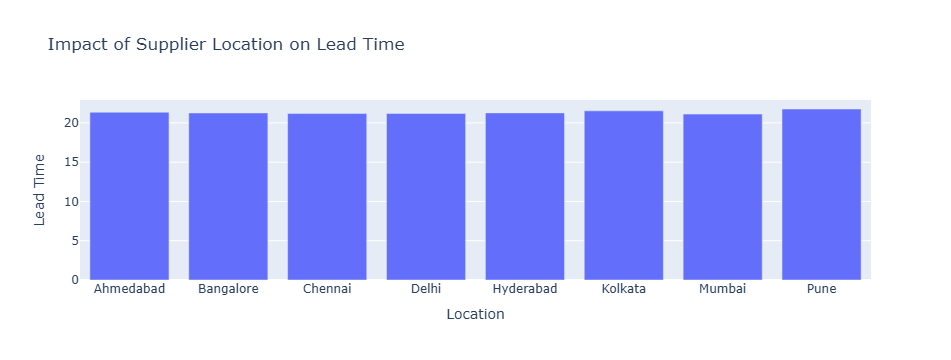

In [61]:
# Group by Supplier Location and calculate the average Lead_time for each location
location_lead_time = df.groupby('Location')['Lead_time'].mean().reset_index()

# Plot using Plotly
fig = px.bar(location_lead_time, x='Location', y='Lead_time', 
             title='Impact of Supplier Location on Lead Time', labels={'Lead_time': 'Lead Time'})
fig.show()

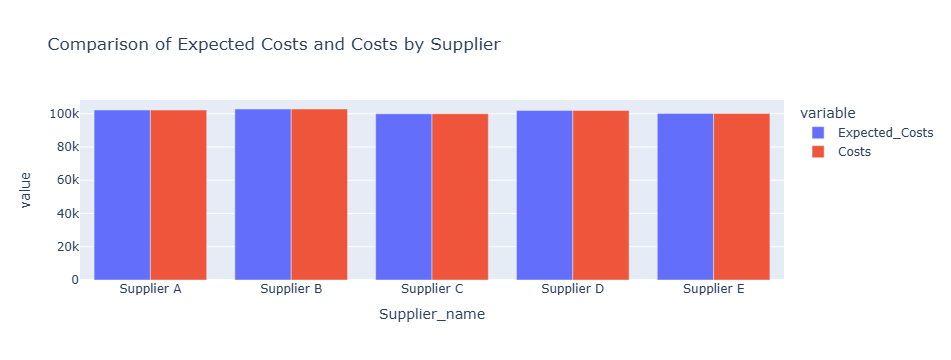

In [62]:
# Group by Supplier_name to compare Expected_Costs with Manufacturing_costs
supplier_cost_comparison = df.groupby('Supplier_name')[['Expected_Costs', 'Costs']].sum().reset_index()

# Plot using Plotly
fig = px.bar(supplier_cost_comparison, x='Supplier_name', y=['Expected_Costs', 'Costs'], barmode='group',
             title='Comparison of Expected Costs and Costs by Supplier')
fig.show()

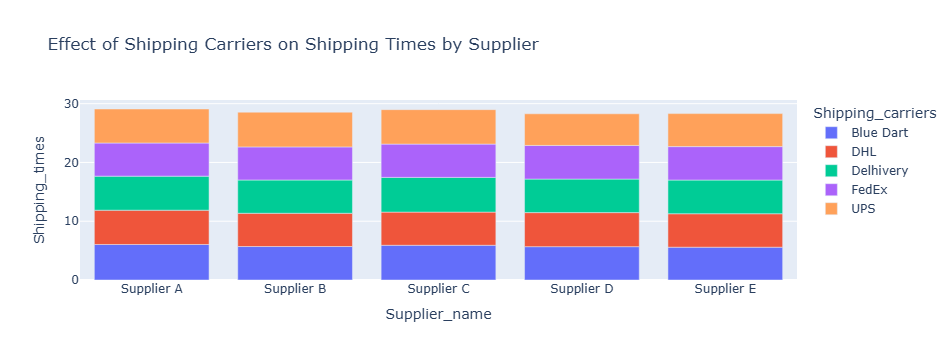

In [63]:
# Group by Supplier_name and Shipping_carriers to find the effect of Shipping_carriers on Shipping_times
carrier_shipping_times = df.groupby(['Supplier_name', 'Shipping_carriers'])['Shipping_times'].mean().reset_index()

# Plot using Plotly
fig = px.bar(carrier_shipping_times, x='Supplier_name', y='Shipping_times', color='Shipping_carriers', 
             title='Effect of Shipping Carriers on Shipping Times by Supplier')
fig.show()

## المجموعة 5: تحليل العملاء (Customer Analysis)

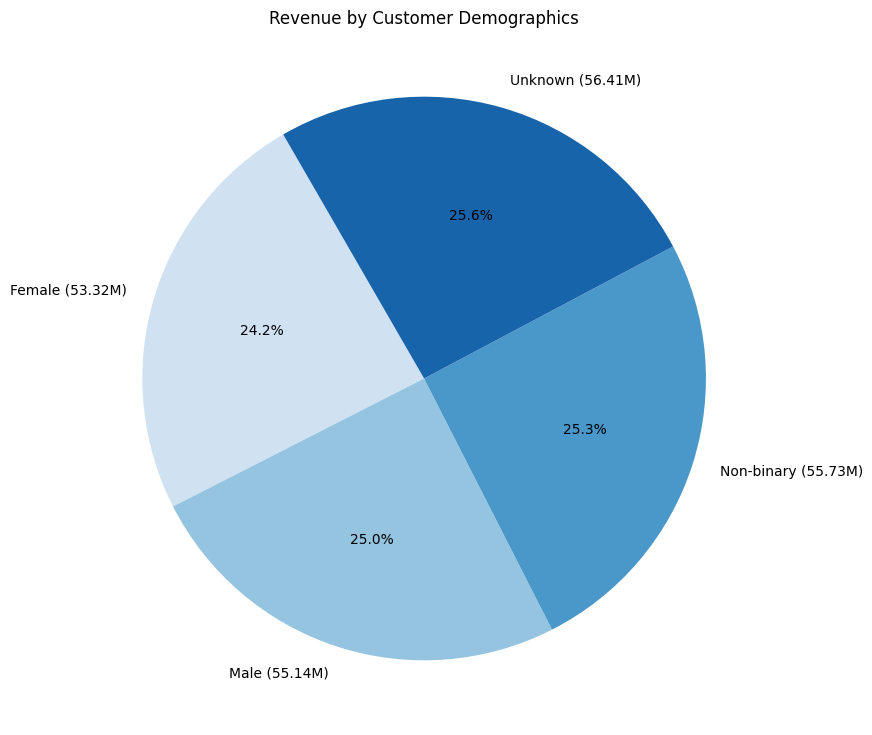

In [64]:
# إجمالي الإيراد لكل فئة
rev = df.groupby("Customer_demographics")["Revenue_generated"].sum()

# تجهيز القيم بصيغة M
labels = [f"{i} ({v/1_000_000:.2f}M)" for i, v in rev.items()]

# ألوان Seaborn
colors = sns.color_palette("Blues", len(rev))

plt.figure(figsize=(8,9))
plt.pie(rev, labels=labels, autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Revenue by Customer Demographics")
plt.axis('equal')
plt.show()

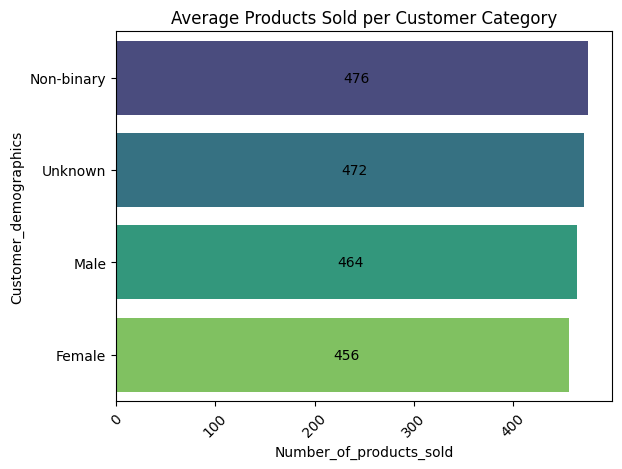

In [65]:
avg_sold_demo = df.groupby("Customer_demographics")["Number_of_products_sold"].mean().reset_index()
avg_sold_demo["Number_of_products_sold"] = avg_sold_demo["Number_of_products_sold"].round()
avg_sold_demo = avg_sold_demo.sort_values("Number_of_products_sold", ascending=False)


ax = sns.barplot(data=avg_sold_demo, x="Number_of_products_sold", y="Customer_demographics", palette="viridis")
plt.title("Average Products Sold per Customer Category")
plt.xticks(rotation=45)

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='black')

plt.show()

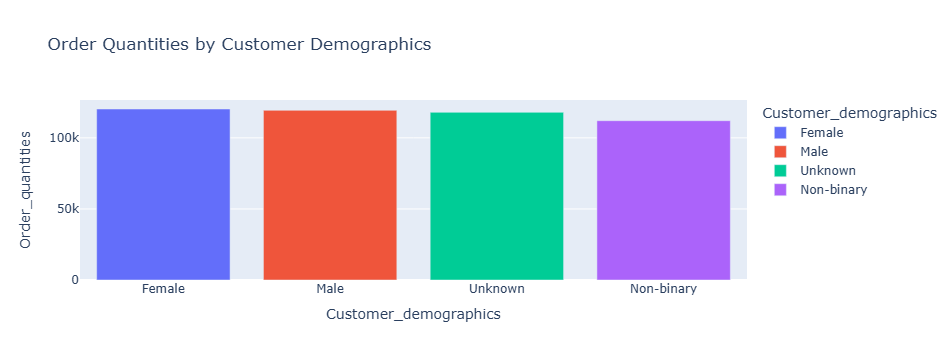

In [66]:
order_cust = df.groupby("Customer_demographics")["Order_quantities"].sum().reset_index()
order_cust = order_cust.sort_values("Order_quantities", ascending=False)


fig = px.bar(
    order_cust,
    x="Customer_demographics",
    y="Order_quantities",
    color="Customer_demographics",
    title="Order Quantities by Customer Demographics"
)
fig.show()

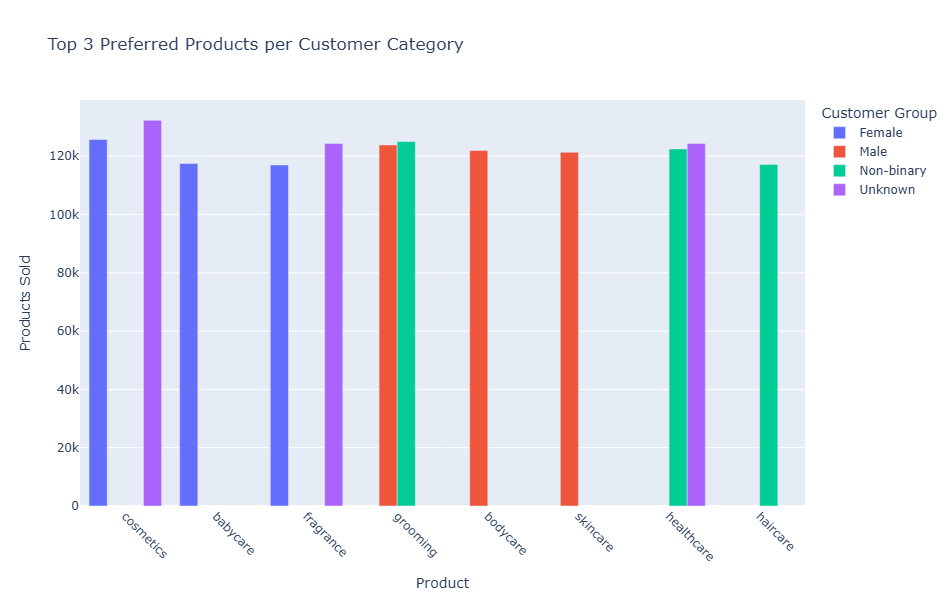

In [67]:
# حساب أعلى 3 منتجات لكل فئة
top3 = (df.groupby(["Customer_demographics","Product_type"])["Number_of_products_sold"].sum().reset_index())

top3 = top3.sort_values(["Customer_demographics","Number_of_products_sold"],ascending=[True, False])

top3 = top3.groupby("Customer_demographics").head(3)

# Plotly bar chart
fig = px.bar(
    top3,
    x="Product_type",
    y="Number_of_products_sold",
    color="Customer_demographics",
    barmode="group",
    title="Top 3 Preferred Products per Customer Category",
    labels={
        "Product_type": "Product",
        "Number_of_products_sold": "Products Sold",
        "Customer_demographics": "Customer Group"
    }
)

fig.update_layout(
    xaxis=dict(tickangle=45),
    height=600
)

fig.show()

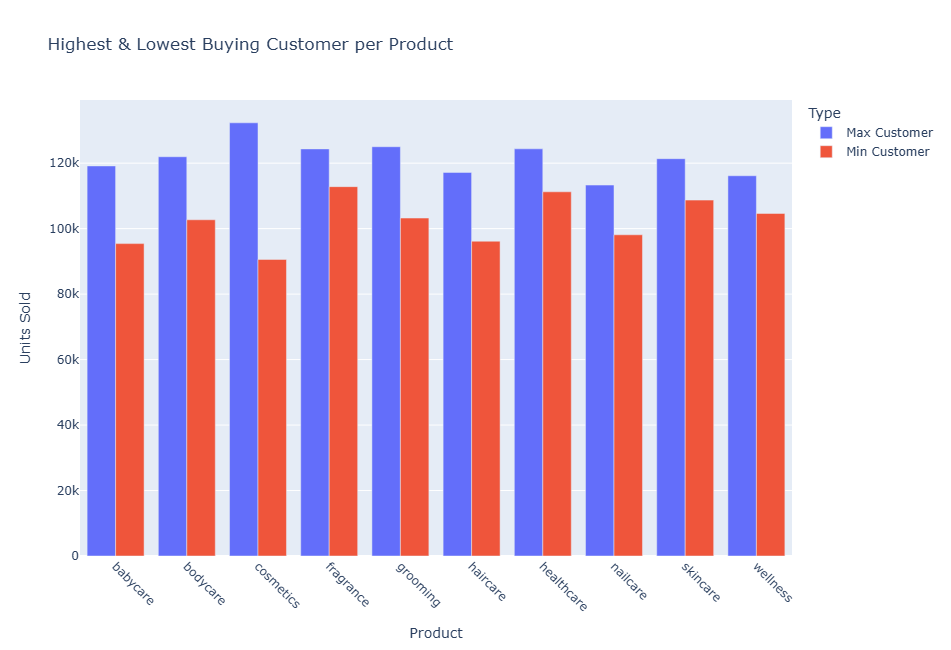

In [68]:
prod_demo = (df.groupby(["Product_type", "Customer_demographics"])["Number_of_products_sold"].sum().reset_index())

# أعلى عميل لكل منتج
max_rows = prod_demo.loc[prod_demo.groupby("Product_type")["Number_of_products_sold"].idxmax()].copy()
max_rows["Type"] = "Max Customer"

# أقل عميل لكل منتج
min_rows = prod_demo.loc[prod_demo.groupby("Product_type")["Number_of_products_sold"].idxmin()].copy()
min_rows["Type"] = "Min Customer"

# دمج الاثنين
extreme_customers = pd.concat([max_rows, min_rows], ignore_index=True)

extreme_customers["Units_k"] = extreme_customers["Number_of_products_sold"] / 1000

# رسم Bar Chart
fig = px.bar(
    extreme_customers,
    x="Product_type",
    y="Number_of_products_sold",
    color="Type",
    barmode="group",
    title="Highest & Lowest Buying Customer per Product",
    labels={
        "Product_type": "Product",
        "Number_of_products_sold": "Units Sold",
    },
    custom_data=["Customer_demographics", "Units_k"]   # ← مهم جداً
)

# تعديل الـ hover ليظهر نوع العميل داخل المربع
fig.update_traces(
    hovertemplate=
    'Type: %{fullData.name}<br>' +
    'Customer: %{customdata[0]}<br>' +    # ← نوع العميل
    'Units Sold: %{customdata[1]:.2f}k<br>' +
    '<extra></extra>'
)

# تحسين التنسيق
fig.update_layout(
    xaxis=dict(tickangle=45),
    height=650
)

fig.show()

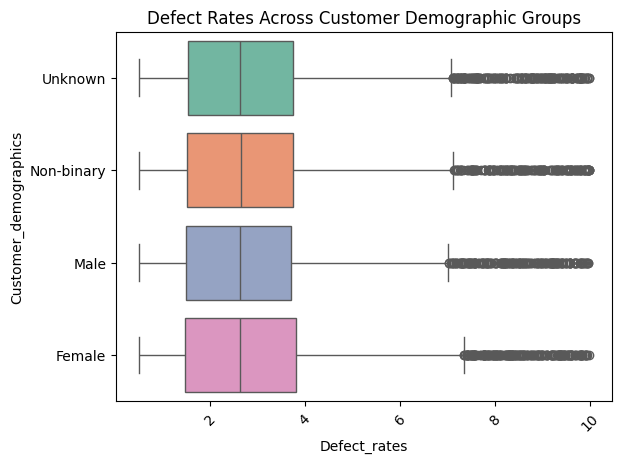

In [69]:
sns.boxplot(data=df, x="Defect_rates", y="Customer_demographics", palette="Set2")
plt.title("Defect Rates Across Customer Demographic Groups")
plt.xticks(rotation=45)
plt.show()

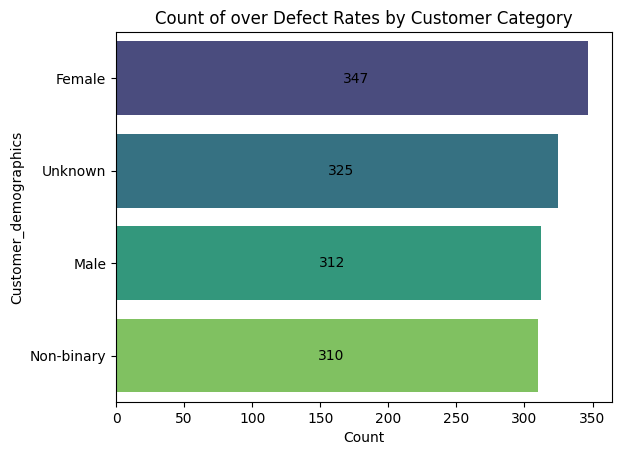

In [70]:
counts_by_demo = (df[df["Defect_rates"] > 6].groupby("Customer_demographics")["Defect_rates"].count().reset_index())
counts_by_demo = counts_by_demo.sort_values("Defect_rates", ascending=False)


ax = sns.barplot(
    data=counts_by_demo,
    x="Defect_rates",
    y="Customer_demographics",
    palette="viridis"
)

plt.title("Count of over Defect Rates by Customer Category")
plt.xlabel("Count")

# Display the values inside the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10,label_type='center', color='black')

plt.show()

## المجموعة 6: تحليل الشحن (Shipping Analysis)

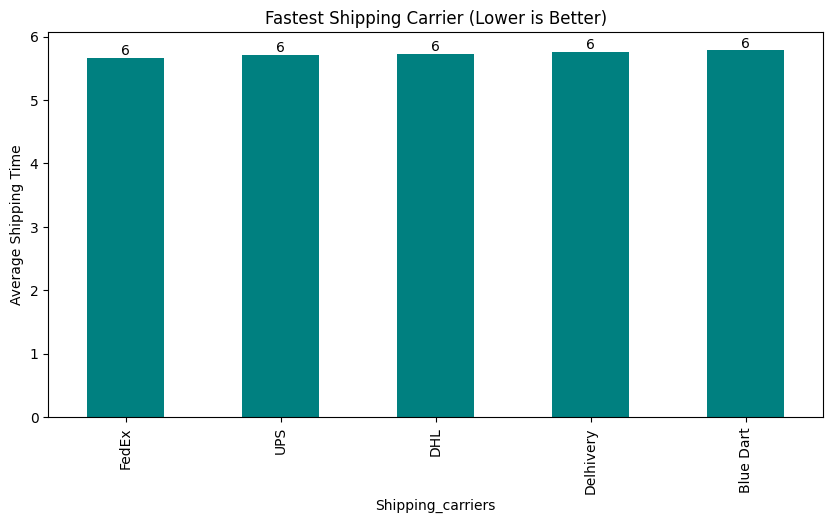

In [71]:
ax = df.groupby("Shipping_carriers")["Shipping_times"].mean().sort_values().plot(
    kind="bar", figsize=(10,5), color="teal"
)

plt.title("Fastest Shipping Carrier (Lower is Better)")
plt.ylabel("Average Shipping Time")

# أسهل طريقة لإظهار الأرقام
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.show()

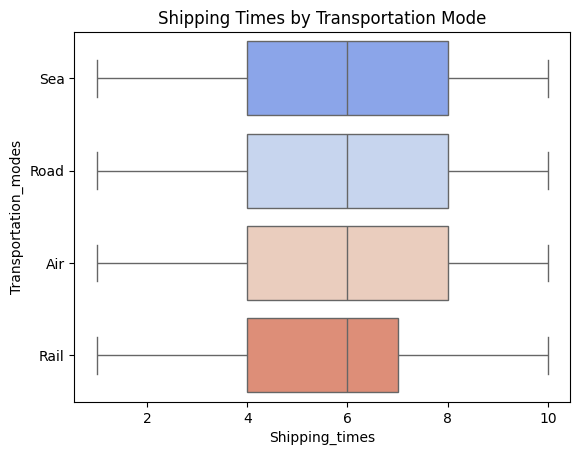

In [72]:
sns.boxplot(data=df, y="Transportation_modes", x="Shipping_times", palette="coolwarm")
plt.title("Shipping Times by Transportation Mode")
plt.show()

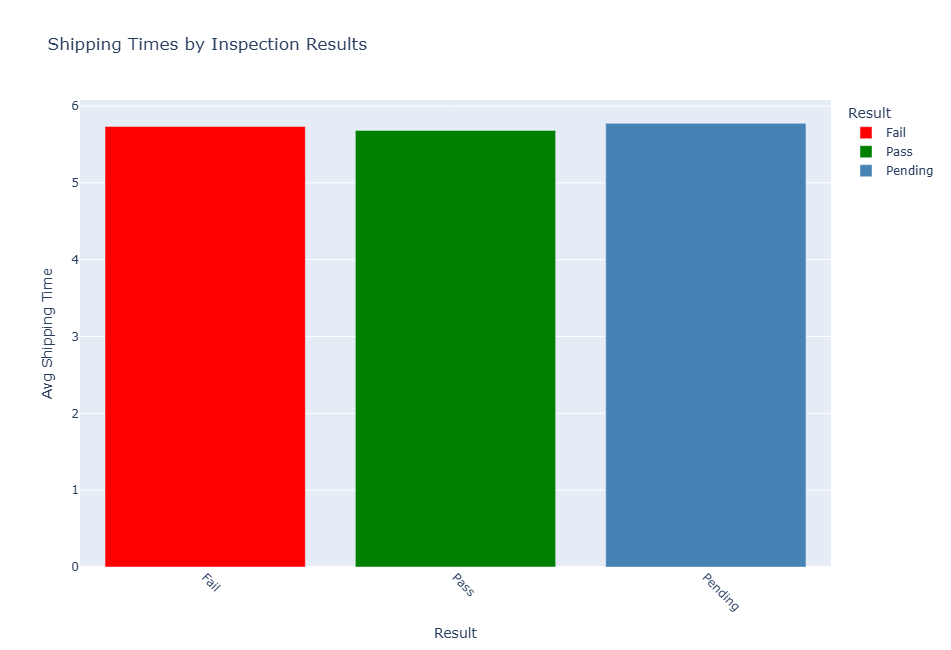

In [73]:
# حساب متوسط وقت الشحن حسب نتيجة الفحص
grouped = (
    df.groupby(["Inspection_results"])["Shipping_times"]
      .mean()
      .reset_index()
)


color_map = {
    "Pass": "green",
    "Fail": "red",
    "Pending": "steelblue"   # تقدر تغيّره لأي لون
}

# رسم Grouped Bar Chart
fig = px.bar(
    grouped,
    x="Inspection_results",
    y="Shipping_times",
    color="Inspection_results",    # يعمل grouping تلقائي
    title="Shipping Times by Inspection Results",
    labels={
        "Inspection_results": "Result",
        "Shipping_times": "Avg Shipping Time",
    },color_discrete_map=color_map  
)

# تعديل الـ hover لعرض المعلومات المهمة بس
fig.update_traces(
    hovertemplate=(
        "Result: %{fullData.name}<br>"
        "Avg Shipping Time: %{y:.0f}<extra></extra>"
    )
)

fig.update_layout(
    xaxis=dict(tickangle=45),
    height=650
)

fig.show()

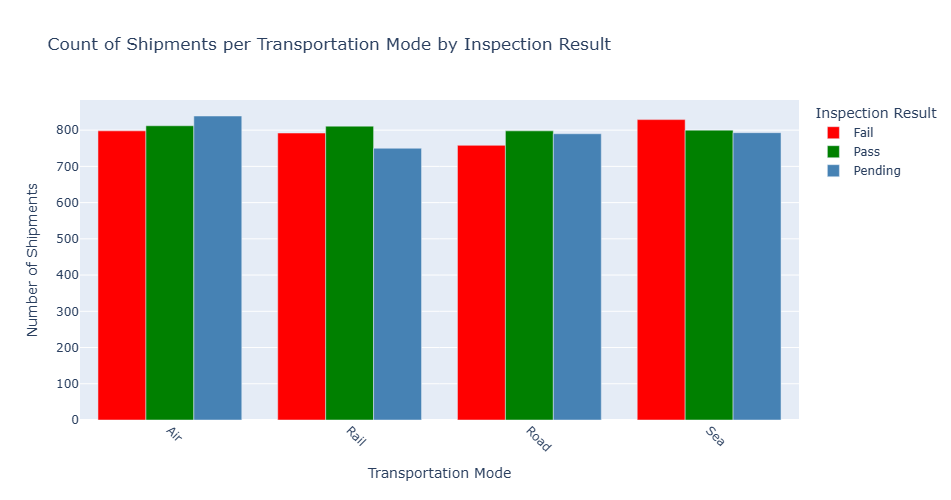

In [74]:
# عدد الشحنات لكل Mode حسب نتيجة الفحص
count_data = (
    df.groupby(["Transportation_modes", "Inspection_results"], as_index=False)
      .size()
      .rename(columns={"size": "Count"})
)

fig = px.bar(
    count_data,
    x="Transportation_modes",
    y="Count",
    color="Inspection_results",
    barmode="group",
    title="Count of Shipments per Transportation Mode by Inspection Result",
    labels={
        "Transportation_modes": "Transportation Mode",
        "Count": "Number of Shipments",
        "Inspection_results": "Inspection Result"
    },
    # ألوان مخصصة
    color_discrete_map={
        "Pass": "green",
        "Fail": "red",
        "Pending": "steelblue"
    }
)

# Hover بسيط وواضح
fig.update_traces(
    hovertemplate=(
        "Transportation Mode: %{x}<br>"
        "Inspection Result: %{fullData.name}<br>"
        "Count: %{y}<extra></extra>"
    )
)

fig.update_layout(xaxis_tickangle=45, height=500)
fig.show()

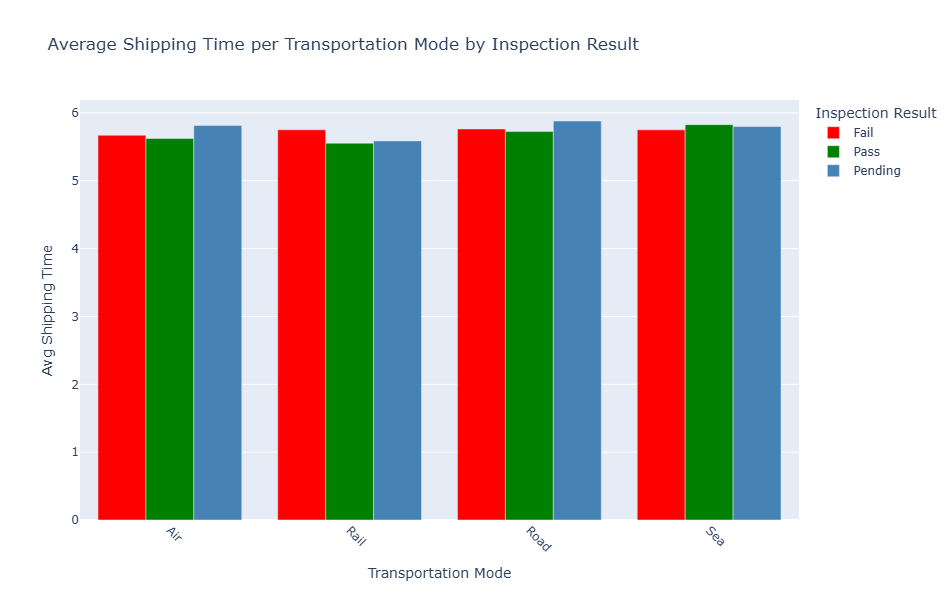

In [75]:
# نجمع بيانات الشحن لكل Mode + Inspection Result
agg_data = (
    df.groupby(["Transportation_modes", "Inspection_results"])["Shipping_times"]
      .agg(Avg_shipping_time="mean", Count="size")   # المتوسط + عدد الشحنات
      .reset_index()
)

fig = px.bar(
    agg_data,
    x="Transportation_modes",
    y="Avg_shipping_time",          # متوسط وقت الشحن
    color="Inspection_results",
    barmode="group",
    title="Average Shipping Time per Transportation Mode by Inspection Result",
    labels={
        "Transportation_modes": "Transportation Mode",
        "Avg_shipping_time": "Avg Shipping Time",
        "Inspection_results": "Inspection Result"
    },
    color_discrete_map={
        "Pass": "green",
        "Fail": "red",
        "Pending": "steelblue"
    }
)

# نضيف الـ Count في الـ hover
fig.update_traces(
    hovertemplate=(
        "Transportation Mode: %{x}<br>"
        "Inspection Result: %{fullData.name}<br>"
        "Avg Shipping Time: %{y:.2f} days<br>"
        "<extra></extra>"
    ),
    customdata=agg_data[["Count"]].values
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

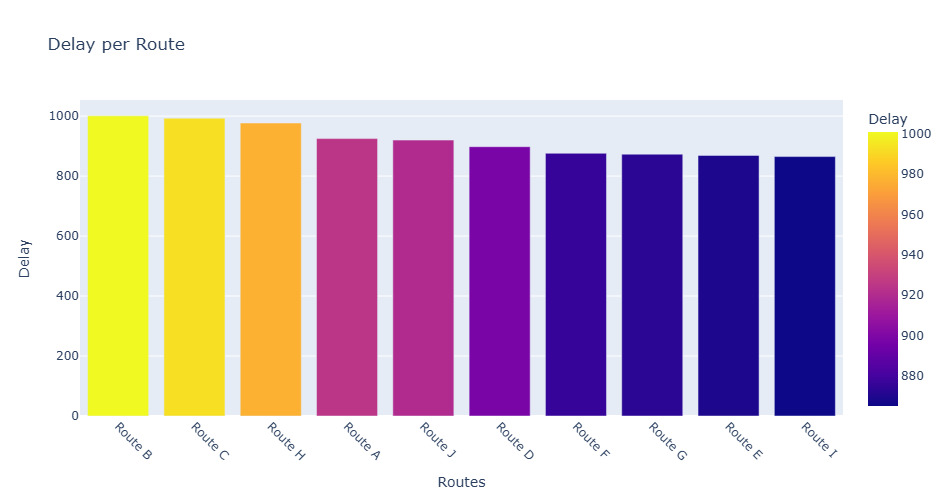

In [76]:
# نرتب البيانات حسب delay تصاعديًا أو تنازليًا
data = (
    df.groupby("Routes")["Delay"]
      .sum()
      .reset_index()
      .sort_values("Delay", ascending=False)   # ↓ غيّرها لـ True لو عايز العكس
)

fig = px.bar(
    data,
    x="Routes",
    y="Delay",
    color="Delay",
    title="Delay per Route",
)

fig.update_layout(xaxis_tickangle=45, height=500)
fig.show()

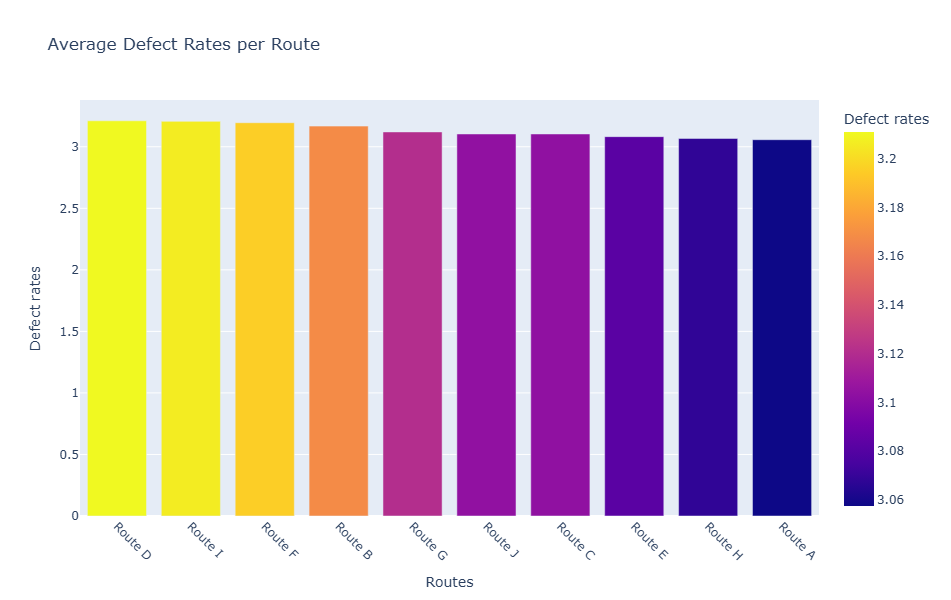

In [77]:
D_routes = df.groupby("Routes")["Defect_rates"].mean().reset_index().sort_values("Defect_rates", ascending= False)

fig = px.bar(
    D_routes,
    x="Routes",
    y="Defect_rates",
    color="Defect_rates",
    title="Average Defect Rates per Route",
    labels={
        "Routes": "Routes",
        "Defect_rates": "Defect rates"
    }
)

fig.update_traces(
    hovertemplate=(
        "Routes: %{x}<br>"
        "Defect rates: %{y:.2f}%<br>"
        "<extra></extra>"
    )
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

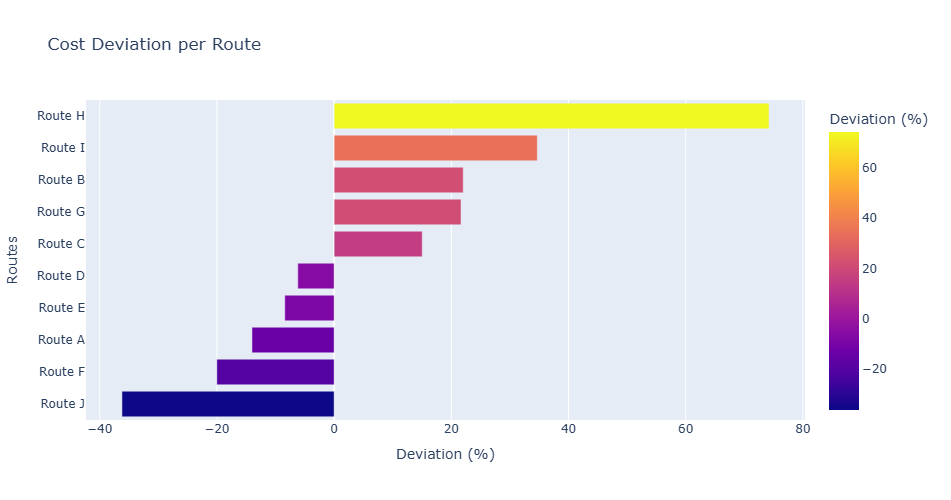

In [78]:
dev_cost = (
    df.groupby("Routes")["Cost_Deviation"]
      .sum()
      .reset_index()
      .sort_values("Cost_Deviation", ascending=True)
)

fig = px.bar(
    dev_cost,
    x="Cost_Deviation",
    y="Routes",
    color="Cost_Deviation",
    title="Cost Deviation per Route",
    labels={
        "Routes": "Routes",
        "Cost_Deviation": "Deviation (%)"
    },
    orientation='h'   # مهم جداً للـ bar الأفقي
)

# تعديل الـ hover للظهور الصحيح
fig.update_traces(
    hovertemplate=
        "Route: %{y}<br>"           # ← route
        "Deviation: %{x:.2f}%<br>"   # ← deviation
        "<extra></extra>"
)

fig.update_layout(height=500)
fig.show()

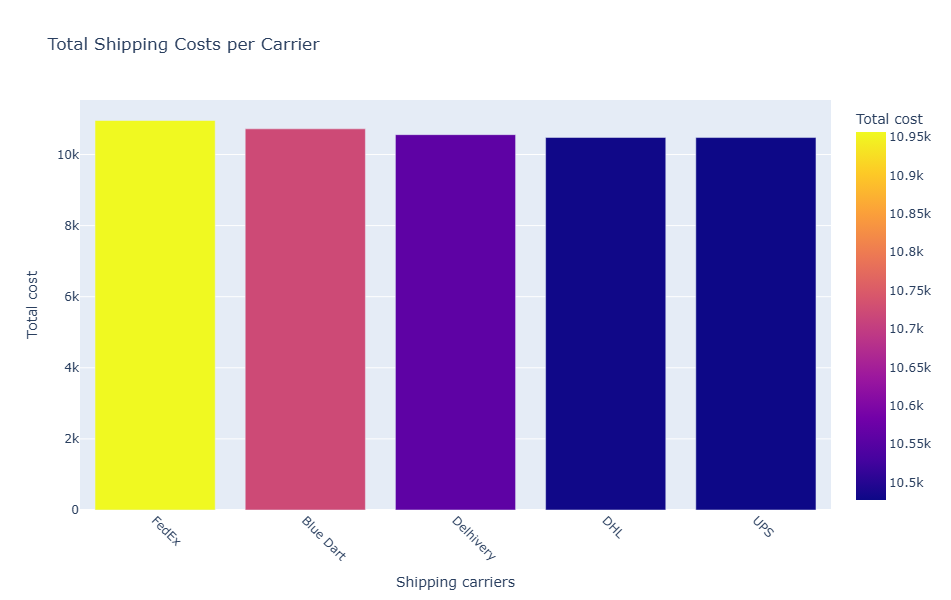

In [79]:
carrier = df.groupby("Shipping_carriers")["Shipping_costs"].sum().reset_index().sort_values("Shipping_costs", ascending=False)


fig = px.bar(
    carrier,
    x="Shipping_carriers",
    y="Shipping_costs",
    color="Shipping_costs",
    title="Total Shipping Costs per Carrier",
    labels={
        "Shipping_carriers": "Shipping carriers",
        "Shipping_costs": "Total cost"
    }
)


fig.update_traces(
    hovertemplate=(
        "Shipping carriers: %{x}<br>"
        "Total cost: %{y:.2f}k<br>"
        "<extra></extra>"
    )
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

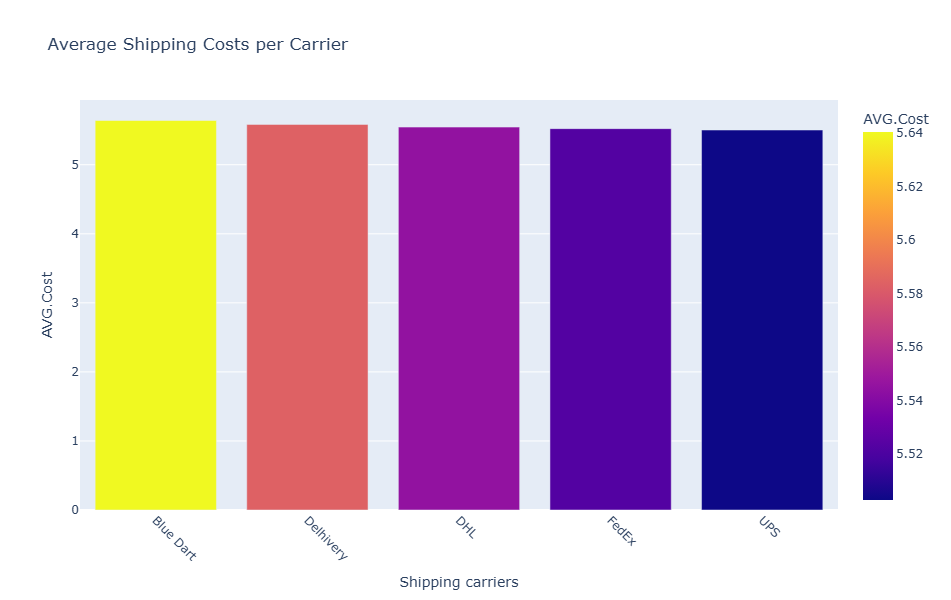

In [80]:
carrier = df.groupby("Shipping_carriers")["Shipping_costs"].mean().reset_index().sort_values("Shipping_costs", ascending=False)

fig = px.bar(
    carrier,
    x="Shipping_carriers",
    y="Shipping_costs",
    color="Shipping_costs",
    title="Average Shipping Costs per Carrier",
    labels={
        "Shipping_carriers": "Shipping carriers",
        "Shipping_costs": "AVG.Cost"
    }
)

fig.update_traces(
    hovertemplate=(
        "Shipping carriers: %{x}<br>"
        "AVG.Cost: %{y:.2f}$<br>"
        "<extra></extra>"
    )
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

## المجموعة 7 — تحليل أداء المنتجات (Product Performance KPIs)

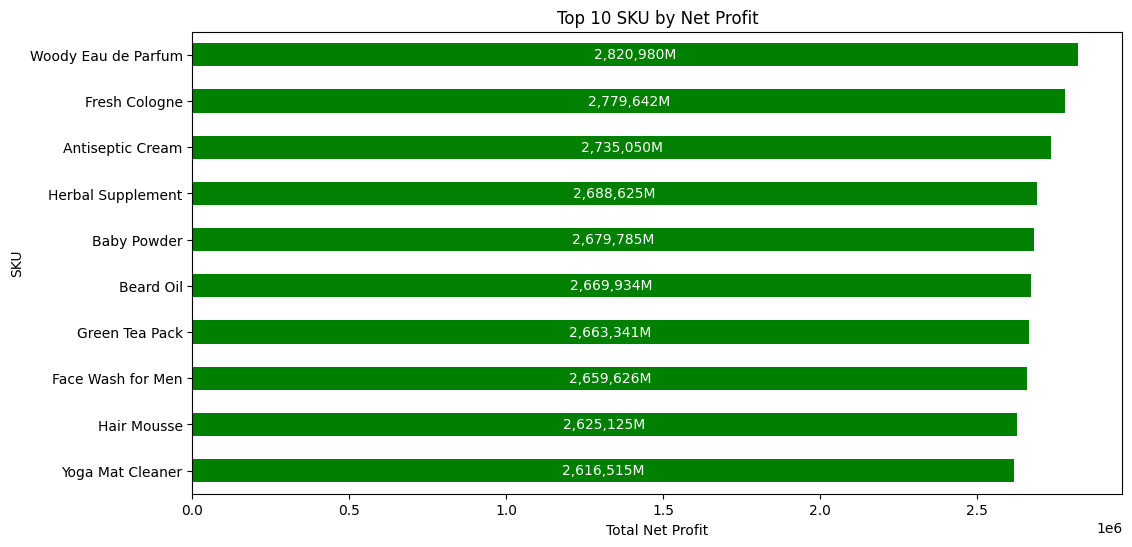

In [81]:
top_profit = df.groupby("SKU")["Net_profit"].sum().sort_values(ascending=False).head(10)

ax = top_profit.plot(kind="barh", figsize=(12,6), color='green')
ax.bar_label(ax.containers[0], fmt='{:,.0f}M', fontsize=10, color='white', label_type='center')

plt.title("Top 10 SKU by Net Profit")
plt.xlabel("Total Net Profit")
plt.ylabel("SKU")
plt.gca().invert_yaxis()
plt.show()

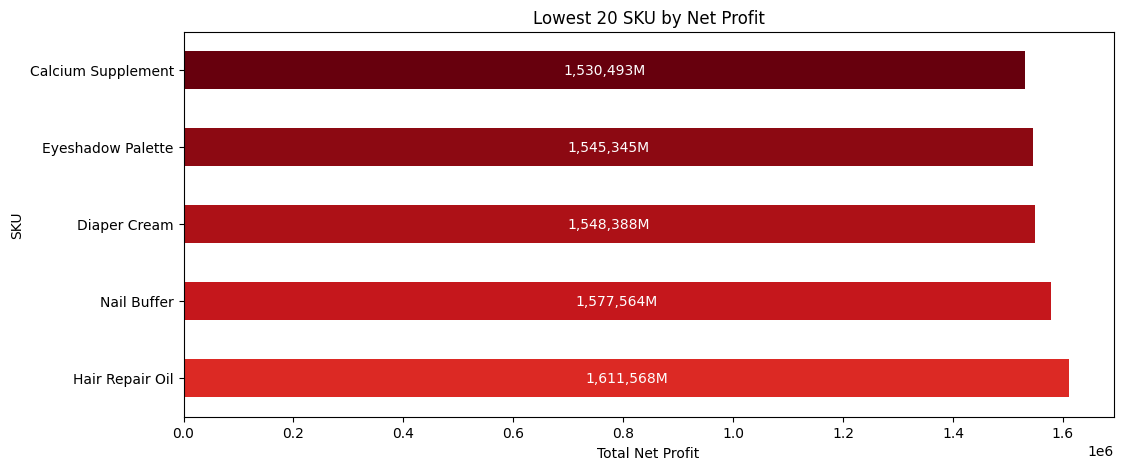

In [82]:
low_profit = df.groupby("SKU")["Net_profit"].sum().sort_values().head(5)

cmap = plt.cm.Reds
colors = cmap(np.linspace(1, 0.3, len(top_profit)))
ax = low_profit.plot(kind="barh", figsize=(12,5), color=colors)
ax.bar_label(ax.containers[0], fmt='{:,.0f}M', fontsize=10, color='White', label_type='center')

plt.title("Lowest 20 SKU by Net Profit")
plt.ylabel("SKU")
plt.xlabel("Total Net Profit")
plt.gca().invert_yaxis()
plt.show()

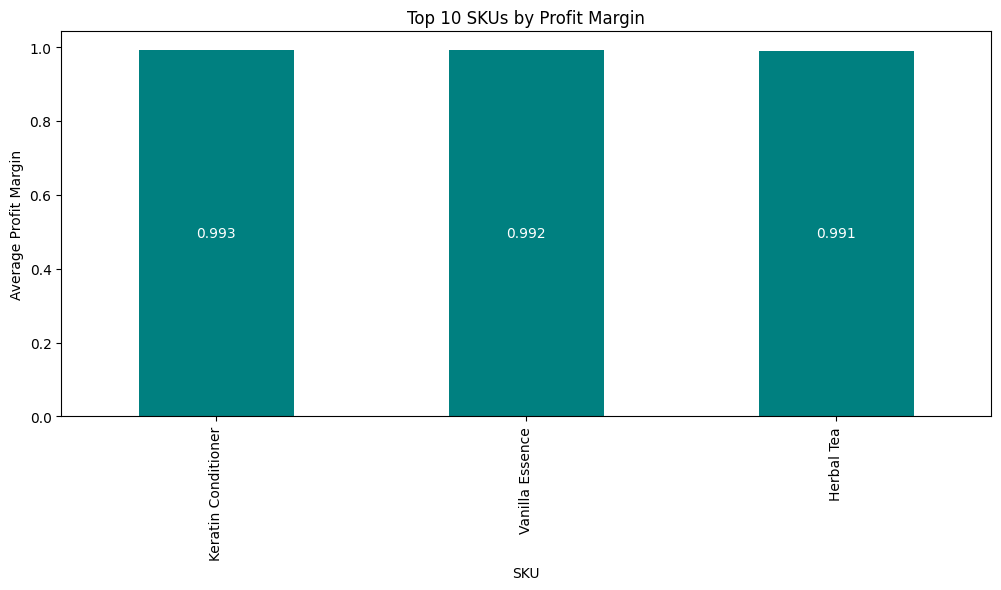

In [83]:
df["Profit_margin"] = df["Net_profit"] / df["Revenue_generated"]

top_margin = (
    df.groupby("SKU")["Profit_margin"]
    .mean()
    .sort_values(ascending=False)
    .head(3))

plt.figure(figsize=(12,5))
ax = top_margin.plot(kind="bar", color="teal")
ax.bar_label(ax.containers[0], fmt='{:,.3f}', fontsize=10, color='White', label_type='center')
plt.title("Top 10 SKUs by Profit Margin")
plt.xlabel("SKU")
plt.ylabel("Average Profit Margin")
plt.show()

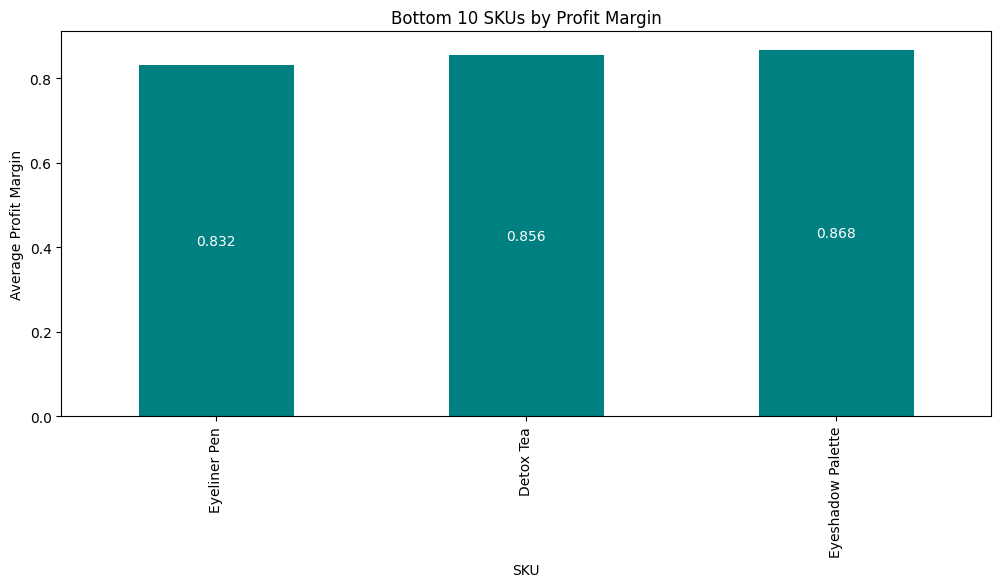

In [84]:
df["Profit_margin"] = df["Net_profit"] / df["Revenue_generated"]

top_margin = (
    df.groupby("SKU")["Profit_margin"]
    .mean()
    .nsmallest(3)          # ← أقل 10 بدل أعلى 10
)

plt.figure(figsize=(12,5))
ax = top_margin.plot(kind="bar", color="teal")

ax.bar_label(
    ax.containers[0],
    fmt='{:,.3f}',
    fontsize=10,
    color='white',
    label_type='center'
)

plt.title("Bottom 10 SKUs by Profit Margin")
plt.xlabel("SKU")
plt.ylabel("Average Profit Margin")
plt.show()

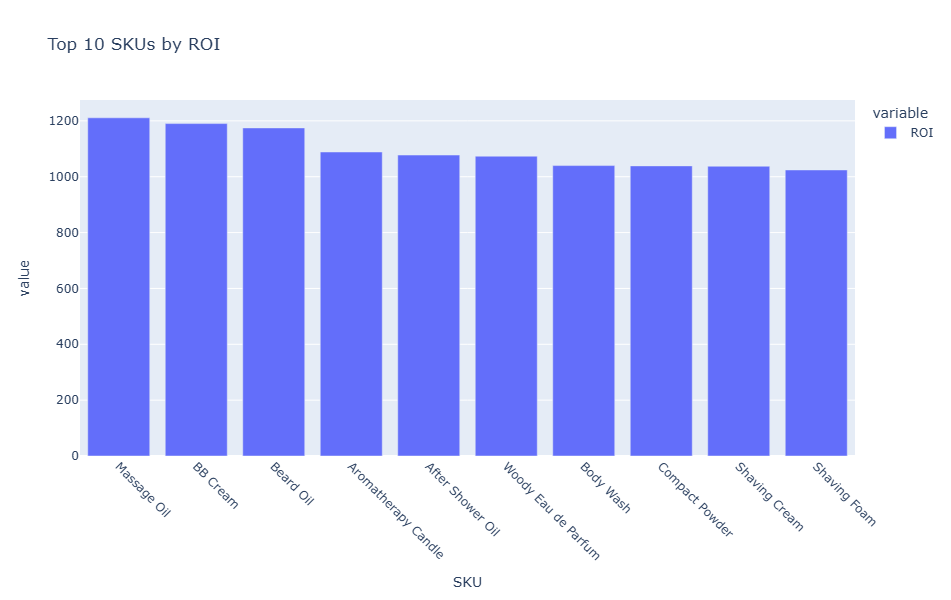

In [85]:
df["ROI"] = df["Net_profit"] / df["Costs"]
roi_table = df.groupby("SKU")["ROI"].mean().sort_values(ascending=False).head(10)

fig = px.bar(roi_table, title="Top 10 SKUs by ROI")

fig.update_traces(
    hovertemplate=(
        "SKU: %{x}<br>"
        "Value: %{y:.0f}k<br>"
        "<extra></extra>" ))

fig.update_layout(xaxis_tickangle=45, height=600)

fig.show()

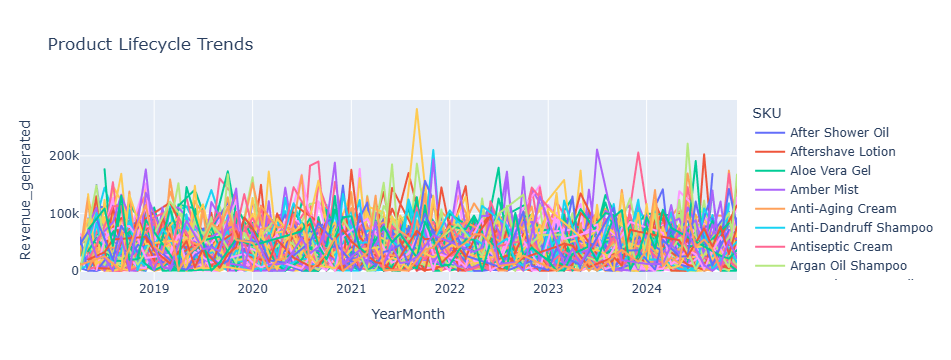

In [86]:
df["YearMonth"] = df["Date"].dt.to_period("M")

sku_lifecycle = df.groupby(["SKU", "YearMonth"])["Revenue_generated"].sum().reset_index()
sku_lifecycle["YearMonth"] = sku_lifecycle["YearMonth"].astype(str)


fig = px.line(sku_lifecycle, x="YearMonth", y="Revenue_generated", color="SKU",
              title="Product Lifecycle Trends")

fig.show()

In [87]:
# ---------- تأكد من تحويل التاريخ ----------
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# ---------- YearMonth كـ string / وعمود datetime لأول يوم في الشهر ----------
df["YearMonth"] = df["Date"].dt.to_period("M").astype(str)
df["YearMonth_dt"] = pd.to_datetime(df["YearMonth"] + "-01")

# ---------- تجميع ----------
sku_lifecycle = df.groupby(["SKU", "YearMonth", "YearMonth_dt"])["Revenue_generated"].sum().reset_index()
# رتّب للتأكد
sku_lifecycle = sku_lifecycle.sort_values(["SKU","YearMonth_dt"])

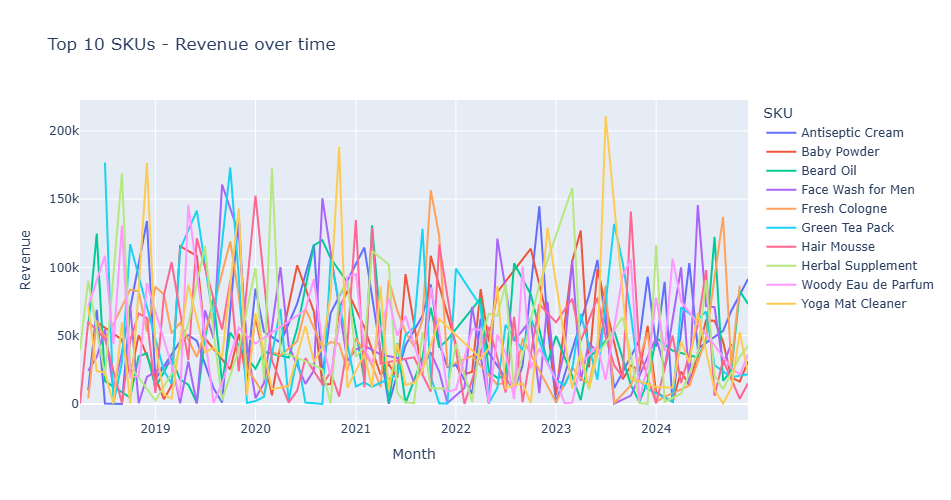

In [88]:
TOP_N = 10

top_skus = (sku_lifecycle.groupby("SKU")["Revenue_generated"]
            .sum().nlargest(TOP_N).index.tolist())

sku_top = sku_lifecycle[sku_lifecycle["SKU"].isin(top_skus)].copy()

fig = px.line(
    sku_top,
    x="YearMonth_dt",
    y="Revenue_generated",
    color="SKU",
    title=f"Top {TOP_N} SKUs - Revenue over time",
    labels={"YearMonth_dt": "Month", "Revenue_generated": "Revenue"}
)
fig.update_layout(legend=dict(orientation="v", x=1.02, y=1), height=500)
fig.show()

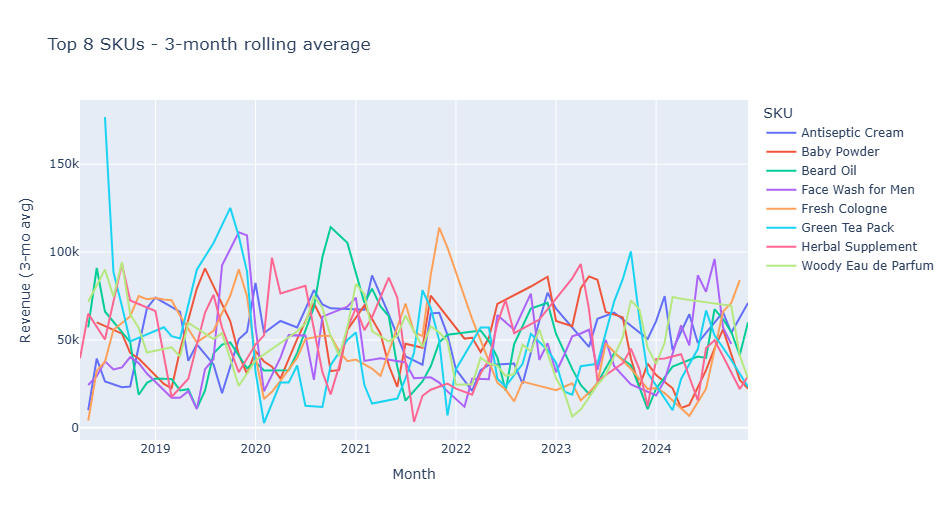

In [89]:
TOP_N = 8  # اختَر TOP_N لتقليل الفوضى

# نأخذ top SKUs حسب المجموع
top_skus = (sku_lifecycle.groupby("SKU")["Revenue_generated"]
            .sum().nlargest(TOP_N).index.tolist())

df_rm = sku_lifecycle[sku_lifecycle["SKU"].isin(top_skus)].copy()
df_rm = df_rm.sort_values(["SKU","YearMonth_dt"])

# متوسط متحرك 3 شهور
df_rm["Revenue_rolling3"] = df_rm.groupby("SKU")["Revenue_generated"].transform(lambda x: x.rolling(3, min_periods=1).mean())

fig = px.line(
    df_rm,
    x="YearMonth_dt",
    y="Revenue_rolling3",
    color="SKU",
    title=f"Top {TOP_N} SKUs - 3-month rolling average",
    labels={"YearMonth_dt":"Month","Revenue_rolling3":"Revenue (3-mo avg)"}
)
fig.update_layout(height=520)
fig.show()

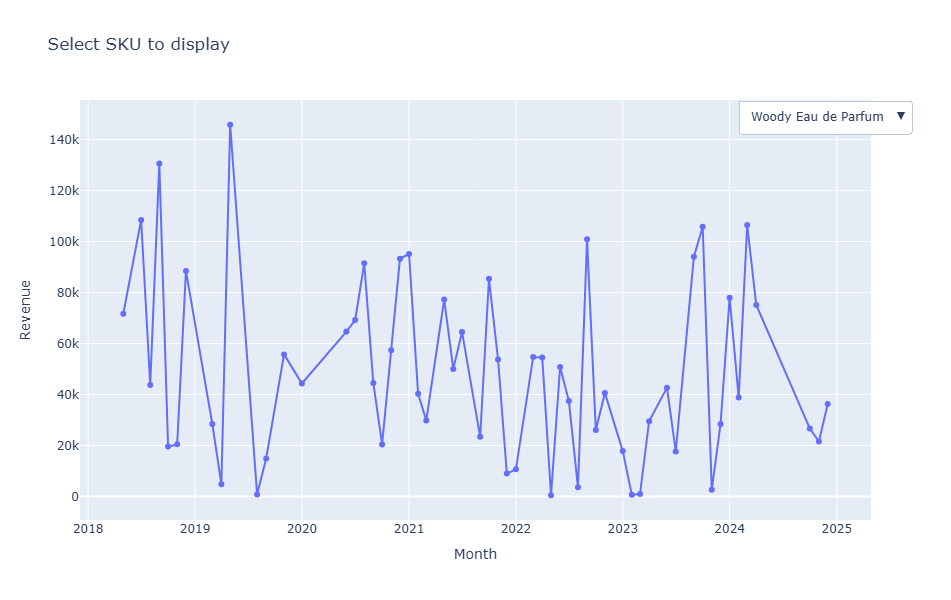

In [90]:
TOP_N = 20  # عدد الخيارات في الـ dropdown 

top_skus = (sku_lifecycle.groupby("SKU")["Revenue_generated"]
            .sum().nlargest(TOP_N).index.tolist())

df_dd = sku_lifecycle[sku_lifecycle["SKU"].isin(top_skus)].copy()
df_dd["Revenue_generated"] = df_dd["Revenue_generated"].round(0)

# نبني traces لكل SKU (مخفيين افتراضياً) ثم نضيف أزرار
fig = go.Figure()
for sku in top_skus:
    df_s = df_dd[df_dd["SKU"]==sku]
    fig.add_trace(go.Scatter(
        x=df_s["YearMonth_dt"],
        y=df_s["Revenue_generated"],
        mode="lines+markers",
        name=sku,
        visible=False
    ))

# أول واحد يظهر افتراضياً
if len(fig.data) > 0:
    fig.data[0].visible = True

# أزرار واحدة لكل SKU
buttons = []
for i, sku in enumerate(top_skus):
    vis = [False] * len(top_skus)
    vis[i] = True
    buttons.append(dict(
        label=sku,
        method="update",
        args=[{"visible": vis},
              {"title": f"Revenue for {sku}"}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.05, y=1)],
    title="Select SKU to display",
    xaxis_title="Month",
    yaxis_title="Revenue",
    height=600
)

fig.show()

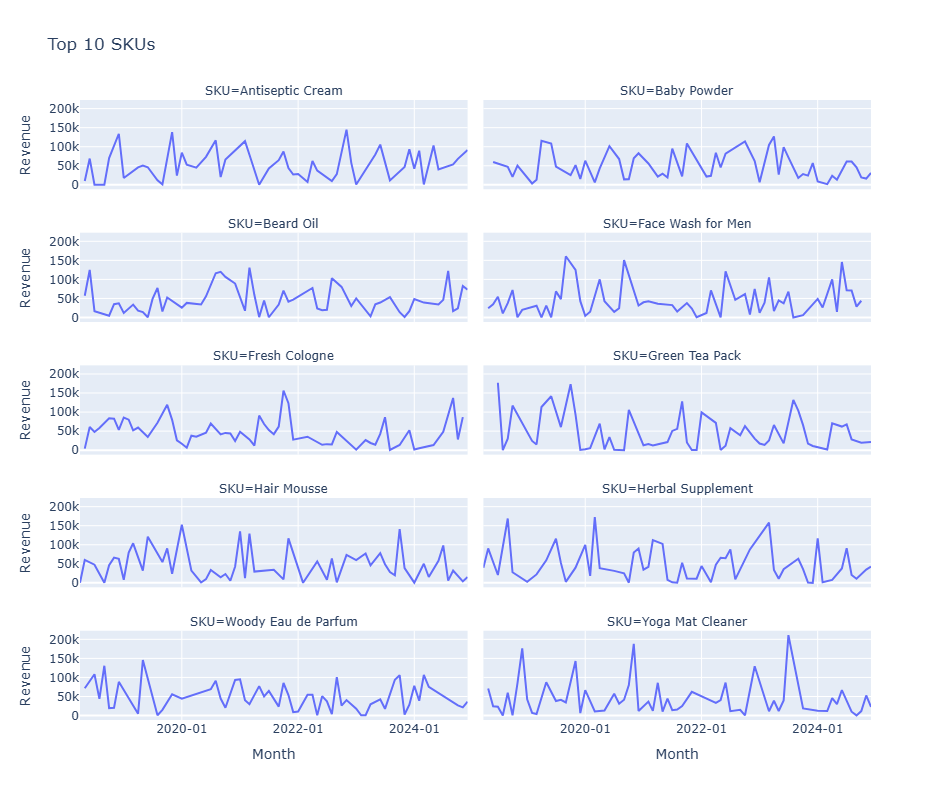

In [91]:
TOP_N = 10 # عدد المربعات (facets) 

top_skus = (sku_lifecycle.groupby("SKU")["Revenue_generated"]
            .sum().nlargest(TOP_N).index.tolist())

df_facet = sku_lifecycle[sku_lifecycle["SKU"].isin(top_skus)].copy()
df_facet["Revenue_generated"] = df_facet["Revenue_generated"].round(0)


fig = px.line(
    df_facet,
    x="YearMonth_dt",
    y="Revenue_generated",
    facet_col="SKU",
    facet_col_wrap=2,   # عدد الأعمدة في الشبكة
    title=f"Top {TOP_N} SKUs",
    labels={"YearMonth_dt":"Month","Revenue_generated":"Revenue"}
)
fig.update_layout(height=800)
# تحسين مسافات المحاور لو لزم
fig.for_each_xaxis(lambda ax: ax.update(tickformat="%Y-%m"))
fig.show()

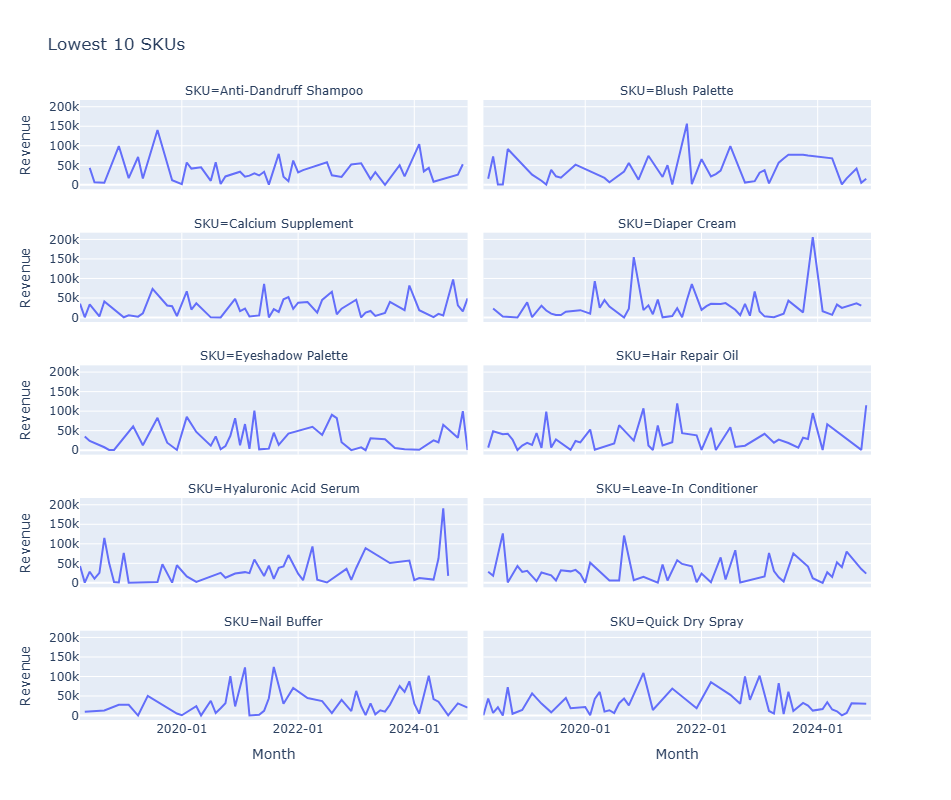

In [92]:
TOP_N = 10  # عدد المربعات (facets)

# أقل 10 SKUs حسب إجمالي الإيراد
top_skus = (sku_lifecycle.groupby("SKU")["Revenue_generated"]
            .sum().nsmallest(TOP_N).index.tolist())

df_facet = sku_lifecycle[sku_lifecycle["SKU"].isin(top_skus)].copy()
df_facet["Revenue_generated"] = df_facet["Revenue_generated"].round(0)


fig = px.line(
    df_facet,
    x="YearMonth_dt",
    y="Revenue_generated",
    facet_col="SKU",
    facet_col_wrap=2,   # عدد الأعمدة في الشبكة
    title=f"Lowest {TOP_N} SKUs",
    labels={"YearMonth_dt":"Month","Revenue_generated":"Revenue"}
)

fig.update_layout(height=800)

fig.for_each_xaxis(lambda ax: ax.update(tickformat="%Y-%m"))

fig.show()

In [93]:
df["Original_Row"] = df.index
df["Issue_flag"] = (df["Revenue_generated"] < df["Revenue_generated"].median()) & \
                   (df["Defect_rates"] > df["Defect_rates"].median())

problematic_products = df[df["Issue_flag"] == True]

problematic_df = problematic_products[["Original_Row", "SKU", "Product_type", "Revenue_generated", "Defect_rates"]]

problematic_df.head()

Original_Row                 SKU Product_type  Revenue_generated  \
430           430     Relaxation Balm     wellness            3796.42   
435           435        Zinc Tablets   healthcare           10751.01   
439           439         Dry Shampoo     haircare            3989.70   
441           441  Calcium Supplement   healthcare           11069.63   
446           446         Oud Intense    fragrance            9340.68   

     Defect_rates  
430          2.67  
435          3.77  
439          2.72  
441          2.70  
446          3.55

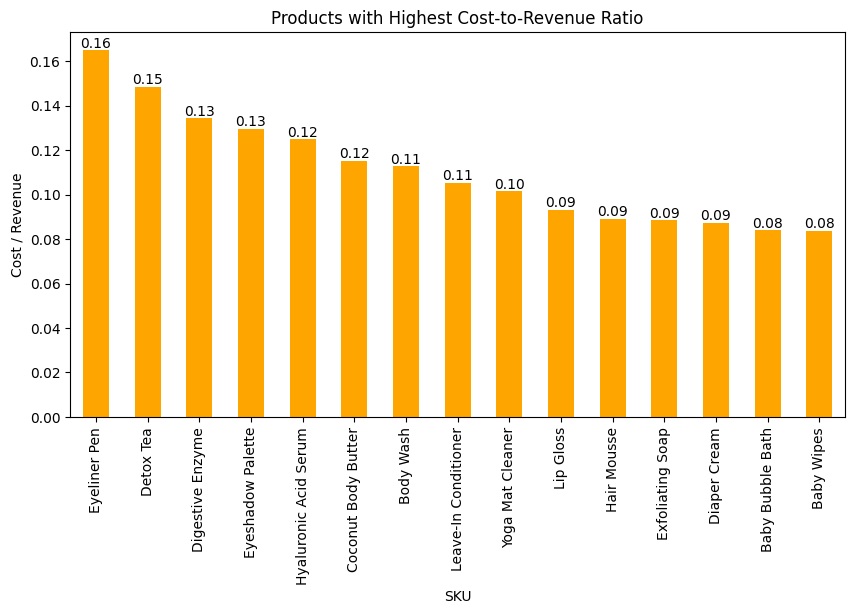

In [94]:
df["Cost_to_Revenue"] = df["Costs"] / df["Revenue_generated"]

cost_heavy = df.groupby("SKU")["Cost_to_Revenue"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
ax = cost_heavy.plot(kind="bar", color="orange")
ax.bar_label(ax.containers[0], fmt='{:,.2f}', fontsize=10, color='black', label_type='edge')

plt.title("Products with Highest Cost-to-Revenue Ratio")
plt.ylabel("Cost / Revenue")
plt.show()

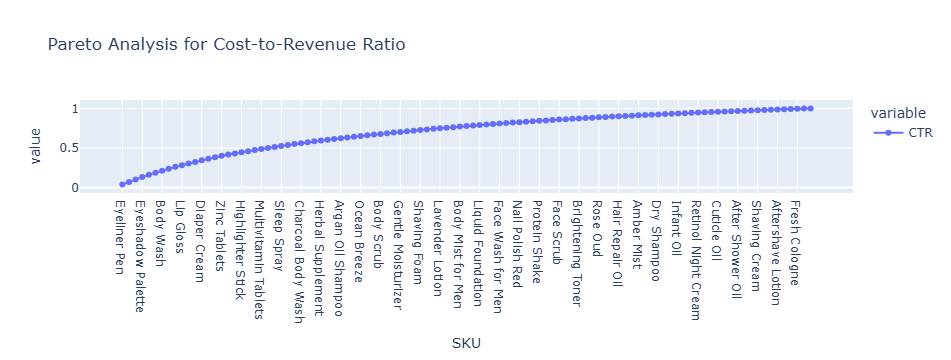

In [95]:
df["CTR"] = df["Costs"] / df["Revenue_generated"]

ctr_sorted = (
    df.groupby("SKU")["CTR"]
    .mean()
    .sort_values(ascending=False))

fig = px.line(
    ctr_sorted.cumsum() / ctr_sorted.sum(),
    title="Pareto Analysis for Cost-to-Revenue Ratio")

fig.update_traces(mode="lines+markers")
fig.show()

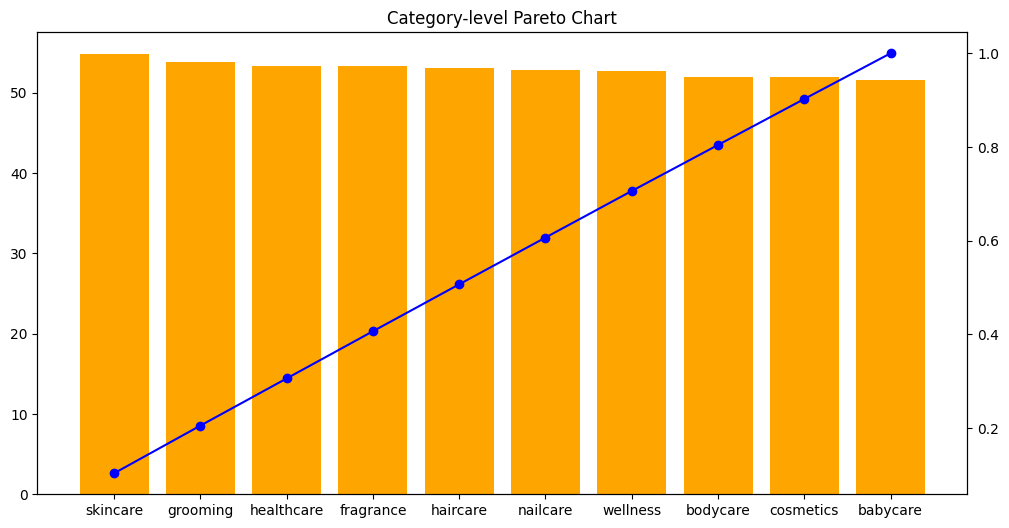

In [96]:
ctr_cat = df.groupby("Product_type")["Costs"].mean().sort_values(ascending=False)

values = ctr_cat.values
cum = np.cumsum(values) / values.sum()

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(ctr_cat.index, values, color='orange')

ax2 = ax1.twinx()
ax2.plot(ctr_cat.index, cum, color='blue', marker='o')

plt.title("Category-level Pareto Chart")
plt.xticks(rotation=45)
plt.show()

## المجموعة 8 — تحليل سلوك السوق (Market Behavior & Customer Value)

In [97]:
aov = df.groupby("Customer_demographics")[["Revenue_generated", "Order_quantities"]].sum()
aov["AOV"] = aov["Revenue_generated"] / aov["Order_quantities"]
aov["AOV"] = aov["AOV"].round(0)

aov_df = aov[["AOV"]].reset_index()
aov_df

Customer_demographics    AOV
0                Female  443.0
1                  Male  462.0
2            Non-binary  497.0
3               Unknown  478.0

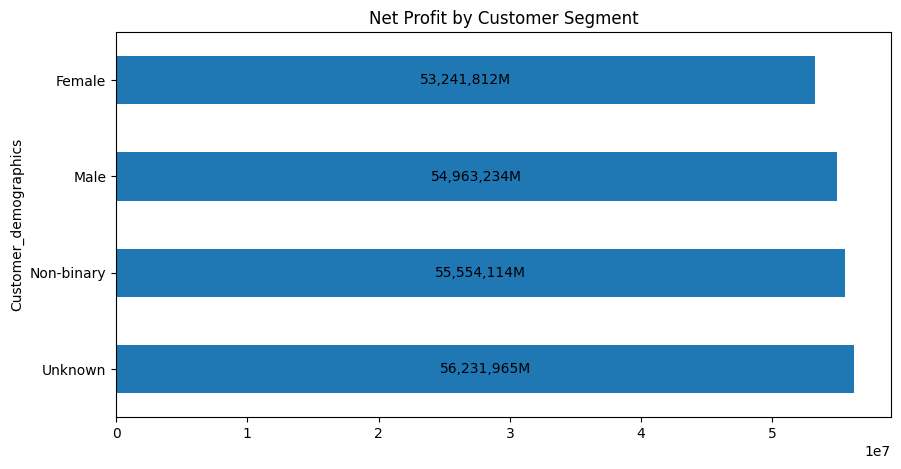

In [98]:
profit_by_customer = df.groupby("Customer_demographics")["Net_profit"].sum().sort_values(ascending=False)

ax = profit_by_customer.plot(kind="barh", figsize=(10,5), title="Net Profit by Customer Segment")
ax.bar_label(ax.containers[0], fmt='{:,.0f}M', fontsize=10, color='black', label_type='center')

plt.show()

In [99]:
df["High_Value_Flag"] = df["Revenue_generated"] > df["Revenue_generated"].quantile(0.90)

vip_customers = df[df["High_Value_Flag"] == True]

vip_customers[["Customer_demographics", "SKU", "Revenue_generated"]].head()

Customer_demographics             SKU  Revenue_generated
442            Non-binary     Dry Shampoo           60466.00
445                  Male    Shaving Foam           58591.15
470               Unknown  Immune Booster          101428.73
490               Unknown       Baby Soap           55366.27
497            Non-binary   Protein Shake           78379.75

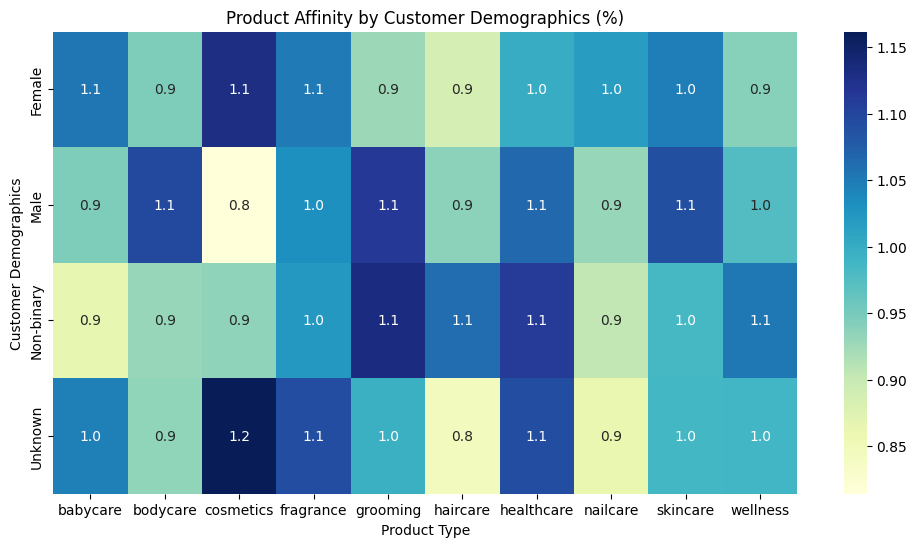

In [100]:
affinity = df.pivot_table(
    index="Customer_demographics",
    columns="Product_type",
    values="Number_of_products_sold",
    aggfunc="sum")

affinity_percent = affinity.div(affinity.sum(axis=1), axis=0) * 10

plt.figure(figsize=(12,6))
ax = sns.heatmap(
    affinity_percent,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f" )

plt.title("Product Affinity by Customer Demographics (%)")
plt.ylabel("Customer Demographics")
plt.xlabel("Product Type")
plt.show()

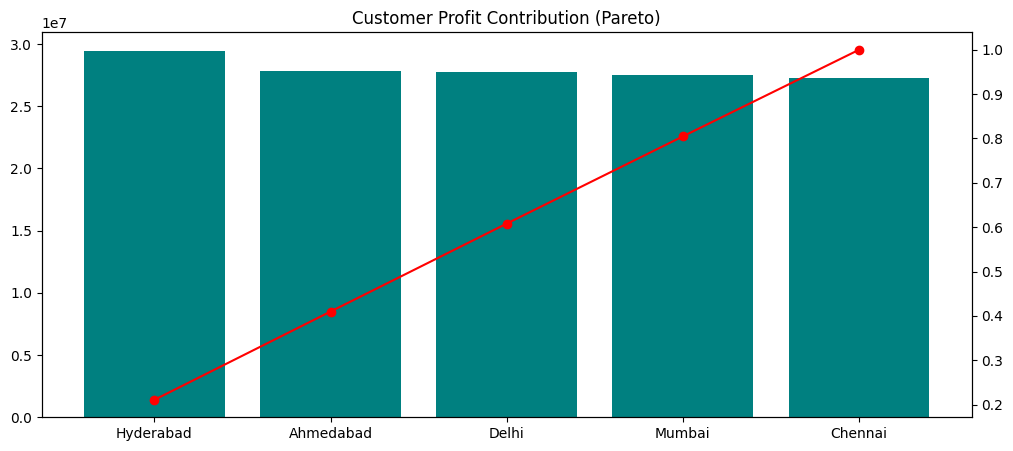

In [101]:
profit_by_customer = (
    df.groupby("Location")["Net_profit"]
    .sum()
    .sort_values(ascending=False).head(5)
)

cum_profit = profit_by_customer.cumsum() / profit_by_customer.sum()

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(profit_by_customer.index, profit_by_customer, color="teal")

ax2 = ax1.twinx()
ax2.plot(profit_by_customer.index, cum_profit, color="red", marker="o")

plt.title("Customer Profit Contribution (Pareto)")
plt.xticks(rotation=45)
plt.show()

## المجموعة 9: التحليل المتقدم – التنبؤ والأنماط

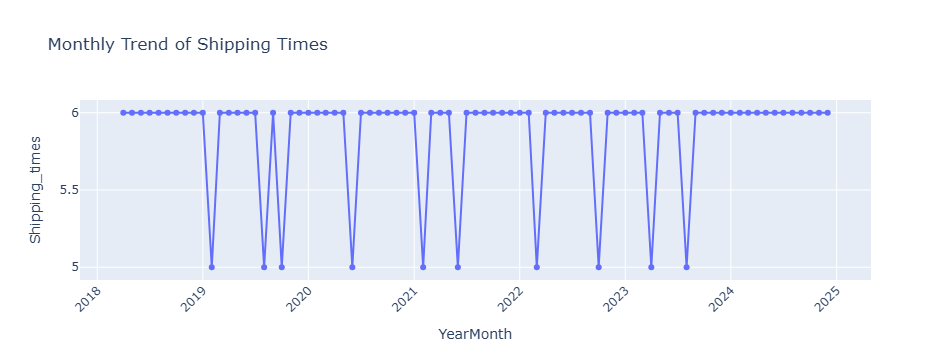

In [102]:
df["Date"] = pd.to_datetime(df["Date"])
df["YearMonth"] = df["Date"].dt.to_period("M").astype(str)

monthly_ship = df.groupby("YearMonth")["Shipping_times"].mean().reset_index()
monthly_ship = monthly_ship.round(0)

fig = px.line(monthly_ship, x="YearMonth", y="Shipping_times", markers=True,
              title="Monthly Trend of Shipping Times")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

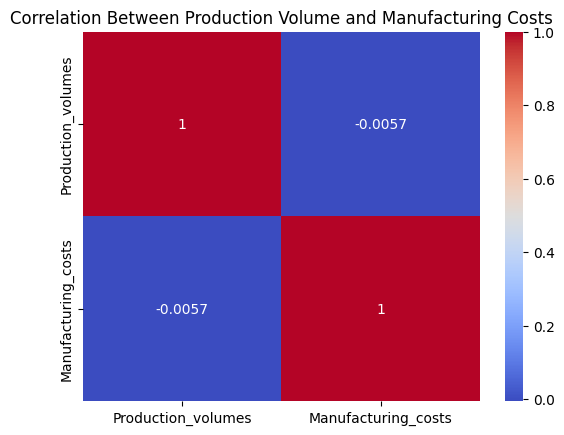

In [103]:
pm_corr = df[["Production_volumes", "Manufacturing_costs"]].corr()

sns.heatmap(pm_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Production Volume and Manufacturing Costs")
plt.show()

## المجموعة 10: تحليل الاتجاهات الزمنية (Trends & Seasonality)

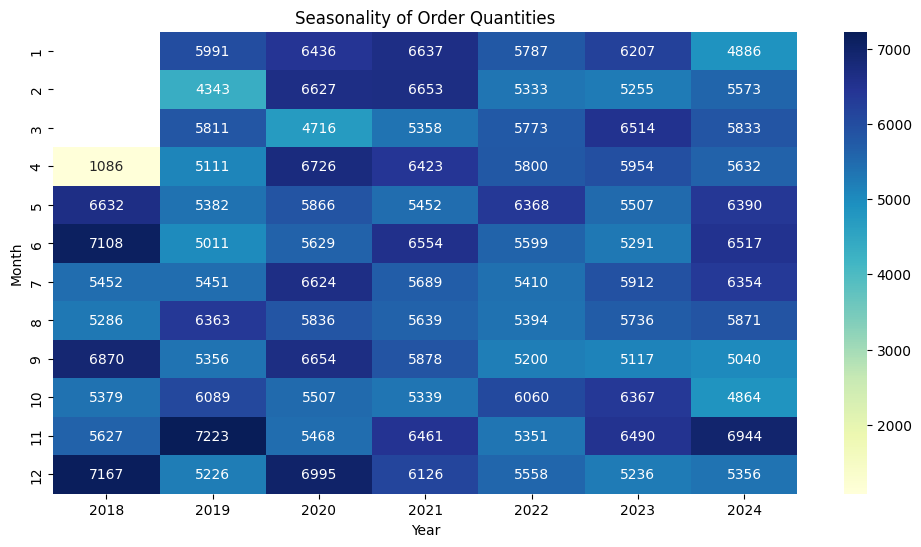

In [104]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

season_pivot = df.pivot_table(
    index="Month",
    columns="Year",
    values="Order_quantities",
    aggfunc="sum"
)
plt.figure(figsize=(12,6))
sns.heatmap(season_pivot, cmap="YlGnBu", annot=True,fmt=".0f")
plt.title("Seasonality of Order Quantities")
plt.show()

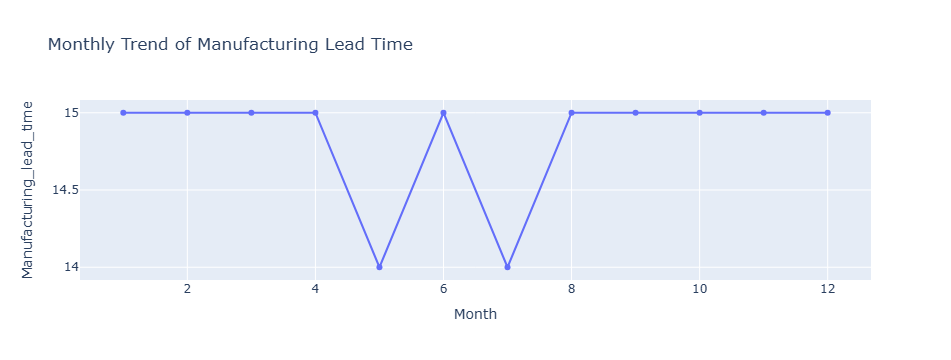

In [105]:
monthly_mlt = df.groupby("Month")["Manufacturing_lead_time"].mean().reset_index()
monthly_mlt = monthly_mlt.round()


fig = px.line(
    monthly_mlt,
    x="Month",
    y="Manufacturing_lead_time",
    markers=True,
    title="Monthly Trend of Manufacturing Lead Time"
)
fig.show()

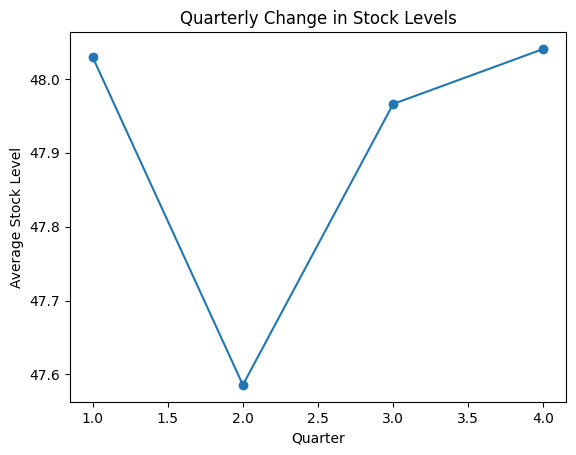

In [106]:
df["Quarter"] = df["Date"].dt.quarter

quarter_stock = df.groupby("Quarter")["Stock_levels"].mean().reset_index()

plt.plot(quarter_stock["Quarter"], quarter_stock["Stock_levels"], marker="o")
plt.title("Quarterly Change in Stock Levels")
plt.xlabel("Quarter")
plt.ylabel("Average Stock Level")
plt.show()

# Week3

## Revenue Forecast

In [107]:
# تأكد من العمود Date
df['Date'] = pd.to_datetime(df['Date'])

# عمود YearMonth للاستخدام الزمني
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)

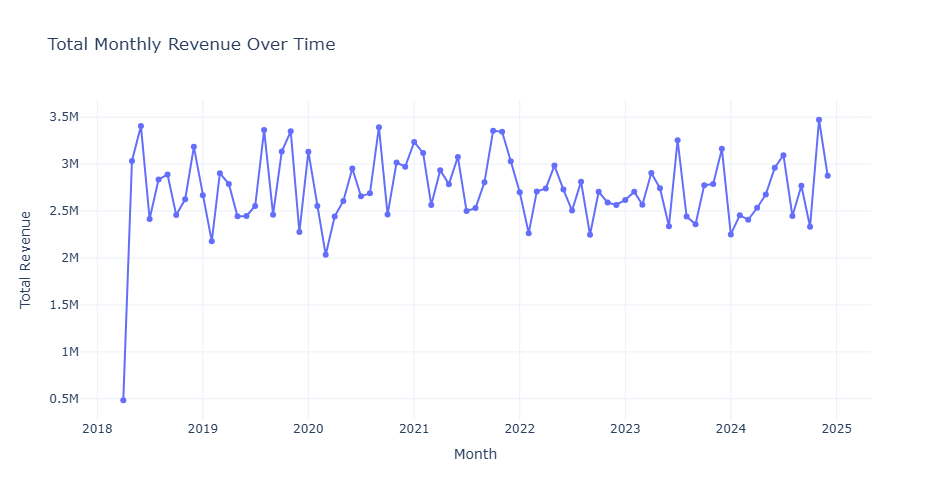

In [108]:
monthly_total = (
    df.groupby('YearMonth')['Revenue_generated']
      .sum()
      .reset_index()
      .sort_values('YearMonth')
)

monthly_total['YearMonth_dt'] = pd.to_datetime(monthly_total['YearMonth'])

fig = px.line(
    monthly_total,
    x='YearMonth_dt',
    y='Revenue_generated',
    title="Total Monthly Revenue Over Time",
    labels={
        'YearMonth_dt': 'Month',
        'Revenue_generated': 'Total Revenue'
    },
    markers=True, 
    template="plotly_white"
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.update_traces(hovertemplate="%{y:,.0f}")

fig.show()

In [109]:
data_rev = monthly_total.copy()

# مؤشر زمني بسيط
data_rev['t'] = np.arange(len(data_rev))

# Features time-based
data_rev['year'] = data_rev['YearMonth_dt'].dt.year
data_rev['month'] = data_rev['YearMonth_dt'].dt.month

# Lag feature – Revenue of previous month
data_rev['rev_lag1'] = data_rev['Revenue_generated'].shift(1)
data_rev['rev_ma3']  = data_rev['Revenue_generated'].rolling(window=3).mean()

# شيل أول كام صف فيهم NaN بسبب shift/rolling
data_rev = data_rev.dropna().reset_index(drop=True)

X = data_rev[['t', 'year', 'month', 'rev_lag1', 'rev_ma3']]
y = data_rev['Revenue_generated']

In [110]:
# بدون Shuffle – تقسيم زمني
split_index = int(len(data_rev) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [111]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def eval_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # MSE فقط
    rmse = mse ** 0.5    
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

eval_model(y_test, y_pred_lr, "Linear Regression (Total Revenue)")
eval_model(y_test, y_pred_rf, "Random Forest (Total Revenue)")

Linear Regression (Total Revenue) -> MAE: 202145.83, RMSE: 237532.97, R²: 0.491
Random Forest (Total Revenue) -> MAE: 211787.23, RMSE: 237128.61, R²: 0.493


In [112]:
test_period = data_rev.iloc[split_index:].copy()
test_period['Predicted_LR'] = y_pred_lr
test_period['Predicted_RF'] = y_pred_rf

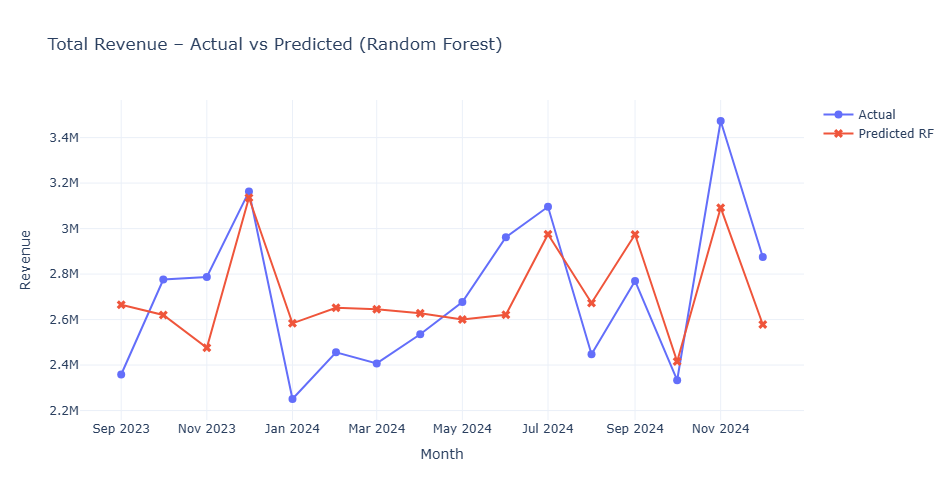

In [113]:
fig = go.Figure()

# Actual Revenue
fig.add_trace(go.Scatter(
    x=test_period['YearMonth_dt'],
    y=test_period['Revenue_generated'],
    mode='lines+markers',
    name='Actual',
    marker=dict(size=8)
))

# Predicted – Random Forest
fig.add_trace(go.Scatter(
    x=test_period['YearMonth_dt'],
    y=test_period['Predicted_RF'],
    mode='lines+markers',
    name='Predicted RF',
    marker=dict(size=8, symbol='x')
))

fig.update_layout(
    title="Total Revenue – Actual vs Predicted (Random Forest)",
    xaxis_title="Month",
    yaxis_title="Revenue",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.update_traces(hovertemplate="%{y:,.0f}M")

fig.show()

In [114]:
# آخر صف في الداتا
last_row = data_rev.iloc[-1].copy()

future_rows = []
n_future = 3

for i in range(1, n_future+1):
    new = {}
    new['t'] = last_row['t'] + i
    # تقدير سنة وشهر بناءً على آخر تاريخ
    future_date = last_row['YearMonth_dt'] + pd.DateOffset(months=i)
    new['YearMonth_dt'] = future_date
    new['year'] = future_date.year
    new['month'] = future_date.month
    
    # نستخدم آخر قيم متاحة كـ lag/ma (بشكل مبسط)
    new['rev_lag1'] = last_row['Revenue_generated']
    new['rev_ma3']  = last_row['rev_ma3']  # ممكن تطورها لاحقًا
    
    future_rows.append(new)

future_df = pd.DataFrame(future_rows)

X_future = future_df[['t', 'year', 'month', 'rev_lag1', 'rev_ma3']]
future_df['Predicted_Revenue_RF'] = rf.predict(X_future)

Futere_Revenue = future_df[['YearMonth_dt', 'Predicted_Revenue_RF']]
Futere_Revenue['Predicted_Revenue_RF'] = Futere_Revenue['Predicted_Revenue_RF'].apply(lambda x: f"{x:,.0f}")
Futere_Revenue

YearMonth_dt Predicted_Revenue_RF
0   2025-01-01            2,975,634
1   2025-02-01            2,974,895
2   2025-03-01            2,961,530

In [115]:
rev_type = (
    df.groupby(['YearMonth', 'Product_type'])['Revenue_generated']
      .sum()
      .reset_index()
)

rev_type['YearMonth_dt'] = pd.to_datetime(rev_type['YearMonth'])
rev_type = rev_type.sort_values(['Product_type', 'YearMonth_dt'])

In [116]:
product = "wellness"   # غيّر النوع على حسب الداتا عندك

rev_p = rev_type[rev_type['Product_type'] == product].copy()

rev_p['t'] = np.arange(len(rev_p))
rev_p['year'] = rev_p['YearMonth_dt'].dt.year
rev_p['month'] = rev_p['YearMonth_dt'].dt.month

rev_p['rev_lag1'] = rev_p['Revenue_generated'].shift(1)
rev_p['rev_ma3']  = rev_p['Revenue_generated'].rolling(window=3).mean()
rev_p = rev_p.dropna().reset_index(drop=True)

X_p = rev_p[['t', 'year', 'month', 'rev_lag1', 'rev_ma3']]
y_p = rev_p['Revenue_generated']

split_idx_p = int(len(rev_p) * 0.8)
X_train_p, X_test_p = X_p.iloc[:split_idx_p], X_p.iloc[split_idx_p:]
y_train_p, y_test_p = y_p.iloc[:split_idx_p], y_p.iloc[split_idx_p:]

rf_p = RandomForestRegressor(n_estimators=200, random_state=42)
rf_p.fit(X_train_p, y_train_p)
y_pred_p = rf_p.predict(X_test_p)

eval_model(y_test_p, y_pred_p, f"RF – Product_type = {product}")

RF – Product_type = wellness -> MAE: 86013.98, RMSE: 96678.11, R²: 0.062


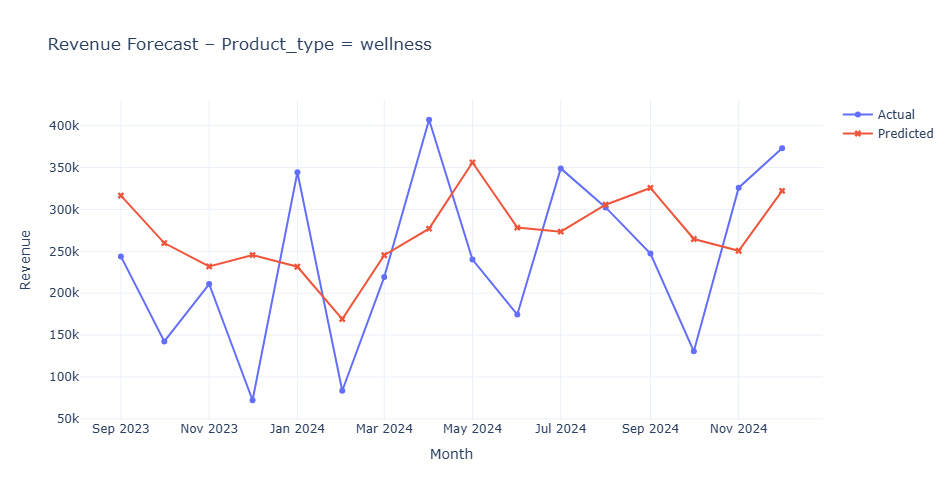

In [117]:
test_period_p = rev_p.iloc[split_idx_p:].copy() 
test_period_p['Predicted_RF'] = y_pred_p

fig = go.Figure()
# Actual
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Revenue_generated'],
    mode='lines+markers',
    name='Actual'
))

# Predicted
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Predicted_RF'],
    mode='lines+markers',
    name='Predicted',
    marker=dict(symbol='x')
))

fig.update_layout(
    title=f"Revenue Forecast – Product_type = {product}",
    xaxis_title="Month",
    yaxis_title="Revenue",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)
fig.update_traces(hovertemplate="%{y:,.0f}")
fig.show()

In [118]:
rev_sku = (
    df.groupby(['YearMonth', 'SKU'])['Revenue_generated']
      .sum()
      .reset_index()
)
rev_sku['YearMonth_dt'] = pd.to_datetime(rev_sku['YearMonth'])
rev_sku = rev_sku.sort_values(['SKU', 'YearMonth_dt'])

In [119]:
sku_id = "Relaxation Balm"  

rev_s = rev_sku[rev_sku['SKU'] == sku_id].copy()

if len(rev_s) < 8:
    print("Data not enough for this SKU – choose another one")
else:
    rev_s['t'] = np.arange(len(rev_s))
    rev_s['year'] = rev_s['YearMonth_dt'].dt.year
    rev_s['month'] = rev_s['YearMonth_dt'].dt.month

    rev_s['rev_lag1'] = rev_s['Revenue_generated'].shift(1)
    rev_s['rev_ma3']  = rev_s['Revenue_generated'].rolling(window=3).mean()
    rev_s = rev_s.dropna().reset_index(drop=True)

    X_s = rev_s[['t', 'year', 'month', 'rev_lag1', 'rev_ma3']]
    y_s = rev_s['Revenue_generated']

    split_idx_s = int(len(rev_s) * 0.8)
    X_train_s, X_test_s = X_s.iloc[:split_idx_s], X_s.iloc[split_idx_s:]
    y_train_s, y_test_s = y_s.iloc[:split_idx_s], y_s.iloc[split_idx_s:]

    rf_s = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_s.fit(X_train_s, y_train_s)
    y_pred_s = rf_s.predict(X_test_s)

    eval_model(y_test_s, y_pred_s, f"RF – SKU = {sku_id}")

RF – SKU = Relaxation Balm -> MAE: 17754.40, RMSE: 20614.32, R²: 0.087


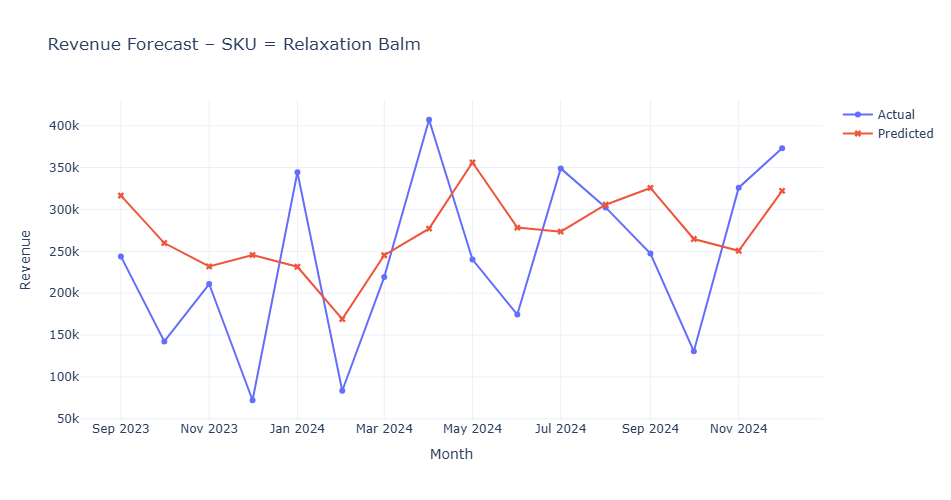

In [120]:
test_period_s = rev_s.iloc[split_idx_s:].copy()
test_period_s['Predicted_RF'] = y_pred_s

fig = go.Figure()
# Actual
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Revenue_generated'],
    mode='lines+markers',
    name='Actual'
))

# Predicted
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Predicted_RF'],
    mode='lines+markers',
    name='Predicted',
    marker=dict(symbol='x')
))

fig.update_layout(
    title=f"Revenue Forecast – SKU = {sku_id}",
    xaxis_title="Month",
    yaxis_title="Revenue",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.update_traces(hovertemplate="%{y:,.0f}")

fig.show()

## Demand Forecast

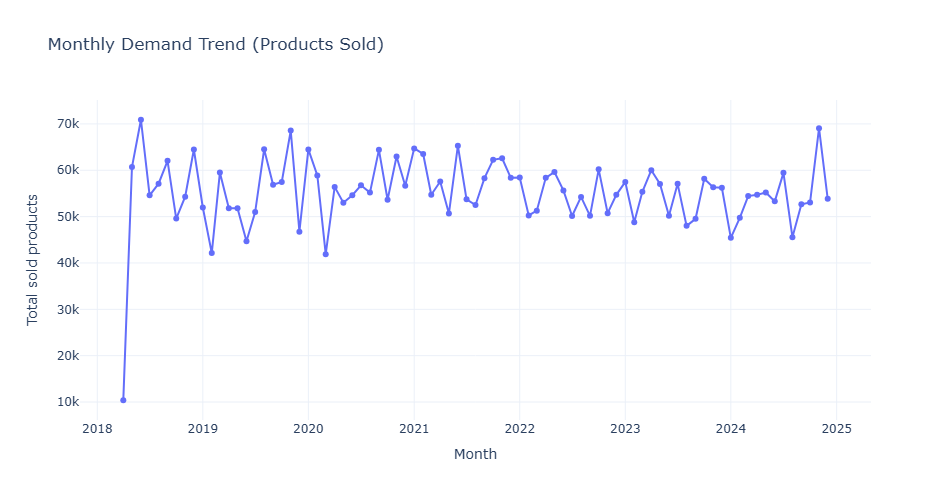

In [121]:
monthly_demand  = (
    df.groupby('YearMonth')['Number_of_products_sold']
      .sum()
      .reset_index()
      .sort_values('YearMonth')
)

monthly_demand['YearMonth_dt'] = pd.to_datetime(monthly_demand['YearMonth'])

fig = px.line(
    monthly_demand,
    x='YearMonth_dt',
    y='Number_of_products_sold',
    title="Monthly Demand Trend (Products Sold)",
    labels={
        'YearMonth_dt': 'Month',
        'Number_of_products_sold': 'Total sold products'
    },
    markers=True, 
    template="plotly_white"
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total sold products',
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)
fig.update_traces(hovertemplate="%{y:,.0f}")
fig.show()

In [122]:
demand_df = monthly_demand.copy()

demand_df['t'] = np.arange(len(demand_df))
demand_df['year'] = demand_df['YearMonth_dt'].dt.year
demand_df['month'] = demand_df['YearMonth_dt'].dt.month

demand_df['lag1'] = demand_df['Number_of_products_sold'].shift(1)
demand_df['ma3']  = demand_df['Number_of_products_sold'].rolling(window=3).mean()

demand_df = demand_df.dropna().reset_index(drop=True)

X = demand_df[['t','year','month','lag1','ma3']]
y = demand_df['Number_of_products_sold']

In [123]:
split_idx = int(len(demand_df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [124]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def eval_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # MSE فقط
    rmse = mse ** 0.5 
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")

eval_model(y_test, y_pred_lr, "LR Demand Model")
eval_model(y_test, y_pred_rf, "RF Demand Model")

LR Demand Model -> MAE=3245.89, RMSE=4132.01, R2=0.422
RF Demand Model -> MAE=3198.01, RMSE=3695.10, R2=0.537


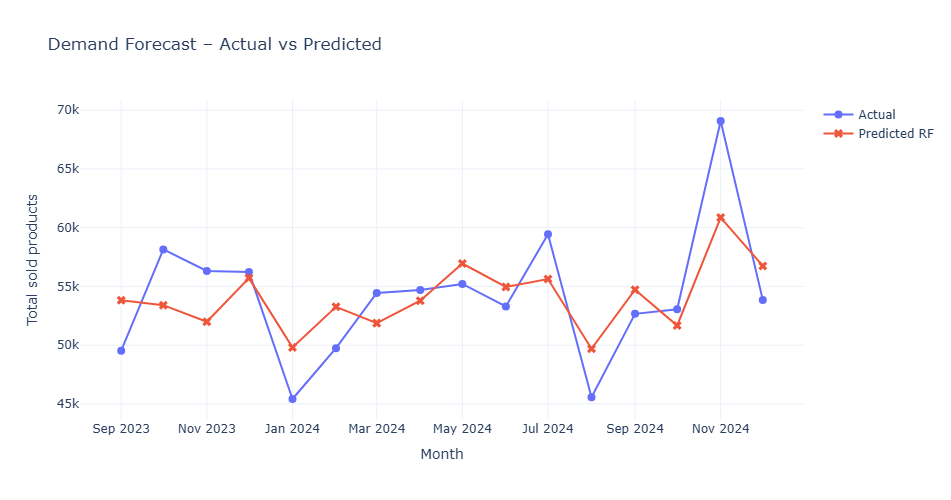

In [128]:
test_period = demand_df.iloc[split_idx:].copy()
test_period['Predicted_RF'] = y_pred_rf

fig = go.Figure()

# Actual Revenue
fig.add_trace(go.Scatter(
    x=test_period['YearMonth_dt'],
    y=test_period['Number_of_products_sold'],
    mode='lines+markers',
    name='Actual',
    marker=dict(size=8)
))

# Predicted – Random Forest
fig.add_trace(go.Scatter(
    x=test_period['YearMonth_dt'],
    y=test_period['Predicted_RF'],
    mode='lines+markers',
    name='Predicted RF',
    marker=dict(size=8, symbol='x')
))

fig.update_layout(
    title="Demand Forecast – Actual vs Predicted",
    xaxis_title="Month",
    yaxis_title="Total sold products",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)
fig.update_traces(hovertemplate="%{y:,.0f}")
fig.show()

In [129]:
last = demand_df.iloc[-1]
future_rows = []
n_future = 6

for i in range(1, n_future+1):
    new = {}
    new['t'] = last['t'] + i
    future_date = last['YearMonth_dt'] + pd.DateOffset(months=i)
    new['YearMonth_dt'] = future_date
    new['year'] = future_date.year
    new['month'] = future_date.month
    new['lag1'] = last['Number_of_products_sold']
    new['ma3'] = last['ma3']
    future_rows.append(new)

future_df = pd.DataFrame(future_rows)

X_future = future_df[['t','year','month','lag1','ma3']]
future_df['Predicted_Demand_RF'] = rf.predict(X_future)

Futere_Demand = future_df[['YearMonth_dt','Predicted_Demand_RF']]
Futere_Demand['Predicted_Demand_RF'] = Futere_Demand['Predicted_Demand_RF'].apply(lambda x: f"{x:,.0f}")
Futere_Demand

YearMonth_dt Predicted_Demand_RF
0   2025-01-01              59,690
1   2025-02-01              59,667
2   2025-03-01              59,370
3   2025-04-01              59,508
4   2025-05-01              59,432
5   2025-06-01              59,782

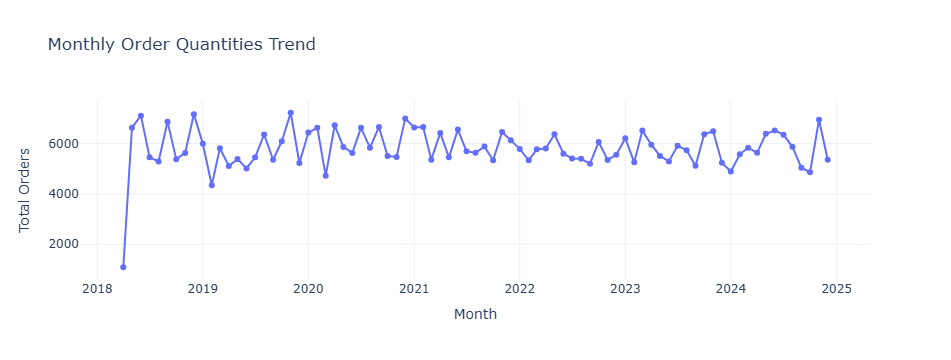

In [132]:
monthly_orders = (
    df.groupby('YearMonth')['Order_quantities']
      .sum()
      .reset_index()
      .sort_values('YearMonth')
)

monthly_orders['YearMonth_dt'] = pd.to_datetime(monthly_orders['YearMonth'])

fig = px.line(
    monthly_orders,
    x='YearMonth_dt',
    y='Order_quantities',
    title="Monthly Order Quantities Trend",
    labels={
        'YearMonth_dt': 'Month',
        'Order_quantities': 'Total Orders'
    },
    markers=True, 
    template="plotly_white"
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Orders',
)

fig.show()

In [133]:
order_df = monthly_orders.copy()
order_df['t'] = np.arange(len(order_df))
order_df['year'] = order_df['YearMonth_dt'].dt.year
order_df['month'] = order_df['YearMonth_dt'].dt.month

order_df['lag1'] = order_df['Order_quantities'].shift(1)
order_df['ma3']  = order_df['Order_quantities'].rolling(window=3).mean()

order_df = order_df.dropna().reset_index(drop=True)

Xo = order_df[['t','year','month','lag1','ma3']]
yo = order_df['Order_quantities']

In [134]:
split_idx_o = int(len(order_df) * 0.8)
Xo_train, Xo_test = Xo.iloc[:split_idx_o], Xo.iloc[split_idx_o:]
yo_train, yo_test = yo.iloc[:split_idx_o], yo.iloc[split_idx_o:]

rf_o = RandomForestRegressor(n_estimators=200, random_state=42)
rf_o.fit(Xo_train, yo_train)

yo_pred = rf_o.predict(Xo_test)

eval_model(yo_test, yo_pred, "RF Order Quantity Forecast")

RF Order Quantity Forecast -> MAE=497.60, RMSE=573.21, R2=0.207


In [135]:
last_o = order_df.iloc[-1]
future_rows = []
n_future = 6

for i in range(1, n_future++1):
    new = {}
    future_date = last_o['YearMonth_dt'] + pd.DateOffset(months=i)
    new['t'] = last_o['t'] + i
    new['YearMonth_dt'] = future_date
    new['year'] = future_date.year
    new['month'] = future_date.month
    new['lag1'] = last_o['Order_quantities']
    new['ma3'] = last_o['ma3']
    future_rows.append(new)

future_orders = pd.DataFrame(future_rows)
future_orders['Predicted_Order_RF'] = rf_o.predict(future_orders[['t','year','month','lag1','ma3']])

Futere_Orders = future_orders[['YearMonth_dt','Predicted_Order_RF']]
Futere_Orders['Predicted_Order_RF'] = Futere_Orders['Predicted_Order_RF'].apply(lambda x: f"{x:,.0f}")
Futere_Orders

YearMonth_dt Predicted_Order_RF
0   2025-01-01              5,818
1   2025-02-01              5,682
2   2025-03-01              5,738
3   2025-04-01              5,771
4   2025-05-01              5,754
5   2025-06-01              5,755

## Profit Forecast

In [136]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

df = df.dropna(subset=['Net_profit'])

In [137]:
# تجميع شهري: ربح، إيراد، تكلفة، متوسط defect
monthly_profit = (
    df.groupby('YearMonth')
      .agg({
          'Net_profit': 'sum',
          'Revenue_generated': 'sum',
          'Costs': 'sum',
          'Defect_rates': 'mean'
      })
      .reset_index()
      .sort_values('YearMonth')
)

monthly_profit['YearMonth_dt'] = pd.to_datetime(monthly_profit['YearMonth'])

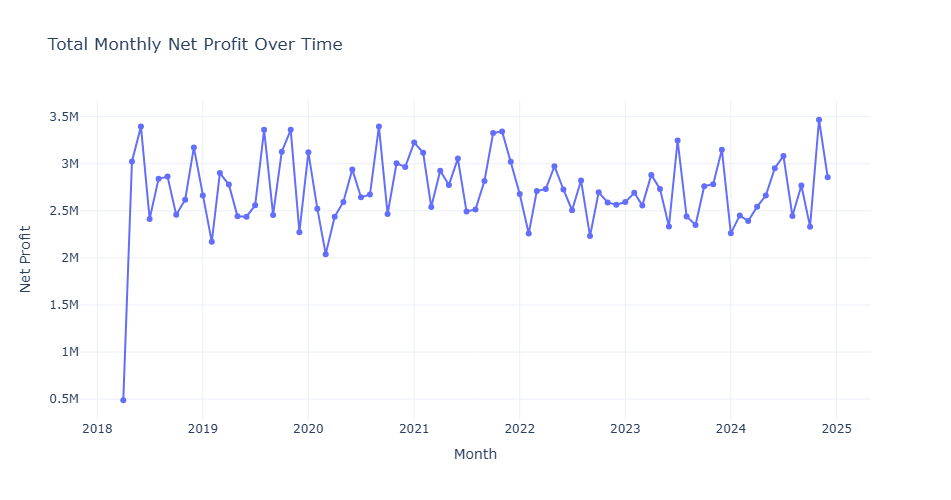

In [138]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_profit['YearMonth_dt'],
    y=monthly_profit['Net_profit'],
    mode='lines+markers',
    name='Net Profit'
))

fig.update_layout(
    title="Total Monthly Net Profit Over Time",
    xaxis_title="Month",
    yaxis_title="Net Profit",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.update_traces(hovertemplate="%{y:,.0f}")

fig.show()

In [139]:
profit_df = monthly_profit.copy()

# مؤشر زمني
profit_df['t'] = np.arange(len(profit_df))
profit_df['year'] = profit_df['YearMonth_dt'].dt.year
profit_df['month'] = profit_df['YearMonth_dt'].dt.month

# Lag & Moving Average على الربح
profit_df['profit_lag1'] = profit_df['Net_profit'].shift(1)
profit_df['profit_ma3']  = profit_df['Net_profit'].rolling(window=3).mean()

# ممكن تستخدم كمان Revenue & Costs كـ Features
# لو حابب تبسط، سيبهم – لو حابب تزود قوة الموديل، ضيفهم
features = ['t', 'year', 'month', 'profit_lag1', 'profit_ma3',
            'Revenue_generated', 'Costs', 'Defect_rates']

profit_df = profit_df.dropna().reset_index(drop=True)

X = profit_df[features]
y = profit_df['Net_profit']


In [140]:
split_idx = int(len(profit_df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [142]:
def eval_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # MSE فقط
    rmse = mse ** 0.5 
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

# Linear Regression
lr_p = LinearRegression()
lr_p.fit(X_train, y_train)
y_pred_lr = lr_p.predict(X_test)
eval_model(y_test, y_pred_lr, "Linear Regression (Net Profit)")

# Random Forest
rf_p = RandomForestRegressor(n_estimators=200, random_state=42)
rf_p.fit(X_train, y_train)
y_pred_rf = rf_p.predict(X_test)
eval_model(y_test, y_pred_rf, "Random Forest (Net Profit)")

Linear Regression (Net Profit) -> MAE: 7522.23, RMSE: 9409.54, R²: 0.999
Random Forest (Net Profit) -> MAE: 20161.49, RMSE: 31928.55, R²: 0.991


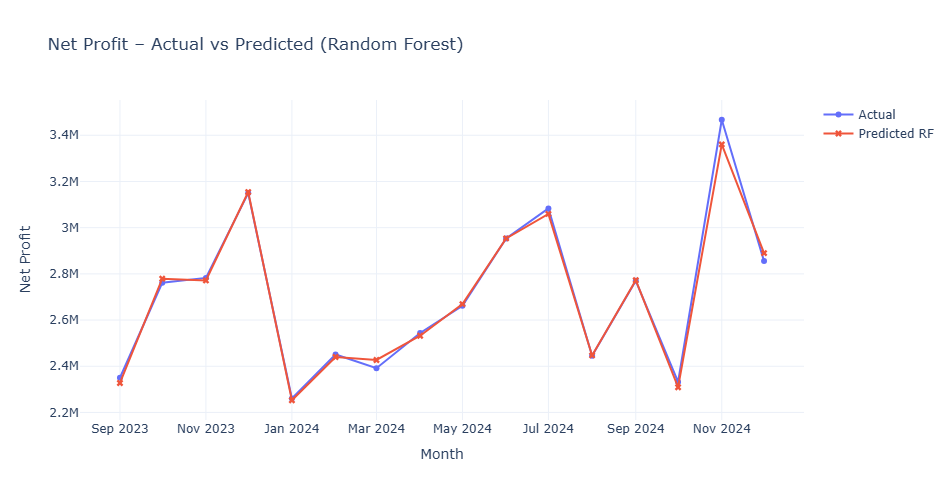

In [143]:
test_period_p = profit_df.iloc[split_idx:].copy()
test_period_p['Predicted_RF'] = y_pred_rf

fig = go.Figure()

# Actual Net Profit
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Net_profit'],
    mode='lines+markers',
    name='Actual'
))

# Predicted Net Profit (RF)
fig.add_trace(go.Scatter(
    x=test_period_p['YearMonth_dt'],
    y=test_period_p['Predicted_RF'],
    mode='lines+markers',
    name='Predicted RF',
    marker=dict(symbol='x')
))

fig.update_layout(
    title="Net Profit – Actual vs Predicted (Random Forest)",
    xaxis_title="Month",
    yaxis_title="Net Profit",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)
fig.update_traces(hovertemplate="%{y:,.0f}")
fig.show()

In [145]:
last_row = profit_df.iloc[-1].copy()

future_rows = []
n_future = 3  # زوّد الرقم لو عايز شهور أكتر

for i in range(1, n_future + 1):
    new = {}
    new['t'] = last_row['t'] + i
    future_date = last_row['YearMonth_dt'] + pd.DateOffset(months=i)
    new['YearMonth_dt'] = future_date
    new['year'] = future_date.year
    new['month'] = future_date.month
    
    # نستخدم آخر قيم معروفة كـ تقريب (تقدر تطور المنطق ده لو حابب)
    new['profit_lag1'] = last_row['Net_profit']
    new['profit_ma3']  = last_row['profit_ma3']
    new['Revenue_generated'] = last_row['Revenue_generated']
    new['Costs'] = last_row['Costs']
    new['Defect_rates'] = last_row['Defect_rates']
    
    future_rows.append(new)

future_profit = pd.DataFrame(future_rows)
X_future = future_profit[features]

future_profit['Predicted_Net_Profit_RF'] = rf_p.predict(X_future)

Futere_Profit = future_profit[['YearMonth_dt','Predicted_Net_Profit_RF']]
Futere_Profit['Predicted_Net_Profit_RF'] = Futere_Profit['Predicted_Net_Profit_RF'].apply(lambda x: f"{x:,.0f}")
Futere_Profit

YearMonth_dt Predicted_Net_Profit_RF
0   2025-01-01               2,892,618
1   2025-02-01               2,892,618
2   2025-03-01               2,891,516